## Context 

- You are a Data Scientist working at the USDA. 

- Your department has been tracking the production of various agricultural commodities across different states.

- The data spans multiple years and states, with varying levels of production for each commodity.

- Your manager has requested that you generate insights from this data to aid in future planning and decision-making. You'll need to use SQL queries to answer the questions that come up in meetings, reports, or strategic discussions.

- In general, this dataset is popular to explore how Dairy Production & Agricultural Commodities have evolved over time, including the participation and performance of different states spanning over multiple years.

- The original sources of data are located below if you are interested in using this data for other purposes 

## Dataset Description:

<u>We'll work on six datasets (in six separate csv files):</u>


- **state_lookup:** Each record describes a unique State_ANSI code for each state.
https://github.com/Johnson02468/Johnson248/blob/21464a845814ea9d00c7cd94e783e80eaf1adf52/state_lookup.csv
- **cheese_production:** Each row describes a production value for State_ANSI codes.
https://github.com/Johnson02468/Johnson248/blob/21464a845814ea9d00c7cd94e783e80eaf1adf52/cheese_production.numbers
- **coffee_production:** Each row describes a production value for State_ANSI codes.
https://github.com/Johnson02468/Johnson248/blob/21464a845814ea9d00c7cd94e783e80eaf1adf52/coffee_production.csv
- **egg_production:** Each row describes a production value for State_ANSI codes.
https://github.com/Johnson02468/Johnson248/blob/21464a845814ea9d00c7cd94e783e80eaf1adf52/egg_production.csv
- **honey_production:** Each row describes a production value for State_ANSI codes.
https://github.com/Johnson02468/Johnson248/blob/21464a845814ea9d00c7cd94e783e80eaf1adf52/honey_production%20copy.csv
- **milk_production:** Each row describes a production value for State_ANSI codes.
https://github.com/Johnson02468/Johnson248/blob/3bb64859ad3c2889b0d9bdfca417aa25b850dd69/milk_production.csv

## Objective:

- Examine/clean the dataset using Python and/or SQL queries.

- Assess state-by-state production for each commodity.

- Identify trends or anomalies.

- Offer data-backed suggestions for areas that may need more attention.

- Explore distributions of single numerical and categorical features via statistics and plots.

- Explore relationships of multiple features via statistics and plots.

- We are only going to explore part of the dataset, please feel free to explore more if you are interested.

### 1. Import the libraries

In [ ]:
import pandas as pd
import sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

### 2. Install Python-sql extension and Connect to SQLite

In [ ]:
!pip3 install ipython-sql

cnn = sqlite3.connect('farm.db')

%load_ext sql

%sql sqlite:///farm.db

### 3. Read the cheese_production CSV file and write it to the SQL database

In [3]:
cheese_production=pd.read_csv('cheese_production.csv')

In [4]:
cheese_production.to_sql('cheese_production',
                         cnn,
                        if_exists= 'replace')

7488

### 4. Verify SQL magic is Functioning and Load Data as a DataFrame

In [5]:
%%sql

Select *
From cheese_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,2023,APR,STATE,6.0,6,TOTAL,"208,807,000"
1,2023,APR,STATE,16.0,6,TOTAL,"86,452,000"
2,2023,APR,STATE,17.0,6,TOTAL,"5,068,000"
3,2023,APR,STATE,19.0,6,TOTAL,"31,512,000"
4,2023,APR,STATE,27.0,6,TOTAL,"69,728,000"


In [6]:
result = %sql Select * From cheese_production

cheese_production = result.DataFrame()

cheese_production.head()

 * sqlite:///farm.db
Done.


,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,0,2023,APR,STATE,6.0,6,TOTAL,"208,807,000"
1,1,2023,APR,STATE,16.0,6,TOTAL,"86,452,000"
2,2,2023,APR,STATE,17.0,6,TOTAL,"5,068,000"
3,3,2023,APR,STATE,19.0,6,TOTAL,"31,512,000"
4,4,2023,APR,STATE,27.0,6,TOTAL,"69,728,000"


### 5. Check Data Type and Number of Non-Null rows. 

In [7]:
cheese_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         7488 non-null   int64  
 1   Year          7488 non-null   int64  
 2   Period        7488 non-null   object 
 3   Geo_Level     7488 non-null   object 
 4   State_ANSI    7035 non-null   float64
 5   Commodity_ID  7488 non-null   int64  
 6   Domain        7488 non-null   object 
 7   Value         7488 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 468.1+ KB


### 6. Check for Unique Values in each column, and Identify Duplicate Rows

In [8]:
#Note we have 13 Periods instead of 12
cheese_production.nunique()

index           7488
Year              54
Period            13
Geo_Level          1
State_ANSI        36
Commodity_ID       1
Domain             1
Value           7091
dtype: int64

In [9]:
cheese_production[cheese_production.duplicated()]

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value


### 7. Confirm Null Counts

In [10]:
cheese_production.isna().sum()

index             0
Year              0
Period            0
Geo_Level         0
State_ANSI      453
Commodity_ID      0
Domain            0
Value             0
dtype: int64

### 8. Generate a Statistical Summary of the Data.

In [11]:
cheese_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,7488.0,3743.500000,2161.743741,0.0,1871.75,3743.5,5615.25,7487.0
Year,7488.0,2002.686966,11.857623,1970.0,1994.00,2002.0,2013.00,2023.0
State_ANSI,7035.0,32.914854,14.080630,1.0,19.00,35.0,46.00,55.0
Commodity_ID,7488.0,6.000000,0.000000,6.0,6.00,6.0,6.00,6.0


### 9. Convert the Value Column to Numeric, Remove commas, and Handle Errors.

In [12]:
cheese_production['Value']= pd.to_numeric(cheese_production['Value'].str.replace(',',''), errors = 'coerce')

In [13]:
cheese_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,0,2023,APR,STATE,6.0,6,TOTAL,208807000.0
1,1,2023,APR,STATE,16.0,6,TOTAL,86452000.0
2,2,2023,APR,STATE,17.0,6,TOTAL,5068000.0
3,3,2023,APR,STATE,19.0,6,TOTAL,31512000.0
4,4,2023,APR,STATE,27.0,6,TOTAL,69728000.0


In [14]:
cheese_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,7488.0,3.743500e+03,2.161744e+03,0.0,1871.75,3743.5,5615.25,7.487000e+03
Year,7488.0,2.002687e+03,1.185762e+01,1970.0,1994.00,2002.0,2013.00,2.023000e+03
State_ANSI,7035.0,3.291485e+01,1.408063e+01,1.0,19.00,35.0,46.00,5.500000e+01
Commodity_ID,7488.0,6.000000e+00,0.000000e+00,6.0,6.00,6.0,6.00,6.000000e+00
Value,7486.0,9.612886e+07,2.631731e+08,26000.0,10258750.00,30334000.0,75192250.00,3.520083e+09


### 10. Display Scientific Notation in a Numeric Output

In [15]:
pd.set_option('display.float_format', '{:,.0f}'.format)

cheese_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"7,488","3,744","2,162",0,"1,872","3,744","5,615","7,487"
Year,"7,488","2,003",12,"1,970","1,994","2,002","2,013","2,023"
State_ANSI,"7,035",33,14,1,19,35,46,55
Commodity_ID,"7,488",6,0,6,6,6,6,6
Value,"7,486","96,128,856","263,173,144","26,000","10,258,750","30,334,000","75,192,250","3,520,083,000"


In [16]:
cheese_production.to_sql('cheese_production', cnn, index=False, if_exists='replace')

7488

### 11. Use the SQL Queries to Verify Max and Average Values.

In [17]:
%%sql

Select Max(value) 
From cheese_production

 * sqlite:///farm.db
Done.


Max(value)
3520083000.0


In [18]:
%%sql

Select AVG(value) 
From cheese_production

 * sqlite:///farm.db
Done.


AVG(value)
96128855.7306973


### 12. Create a Histogram and Box Plot to Identify Outliers. 

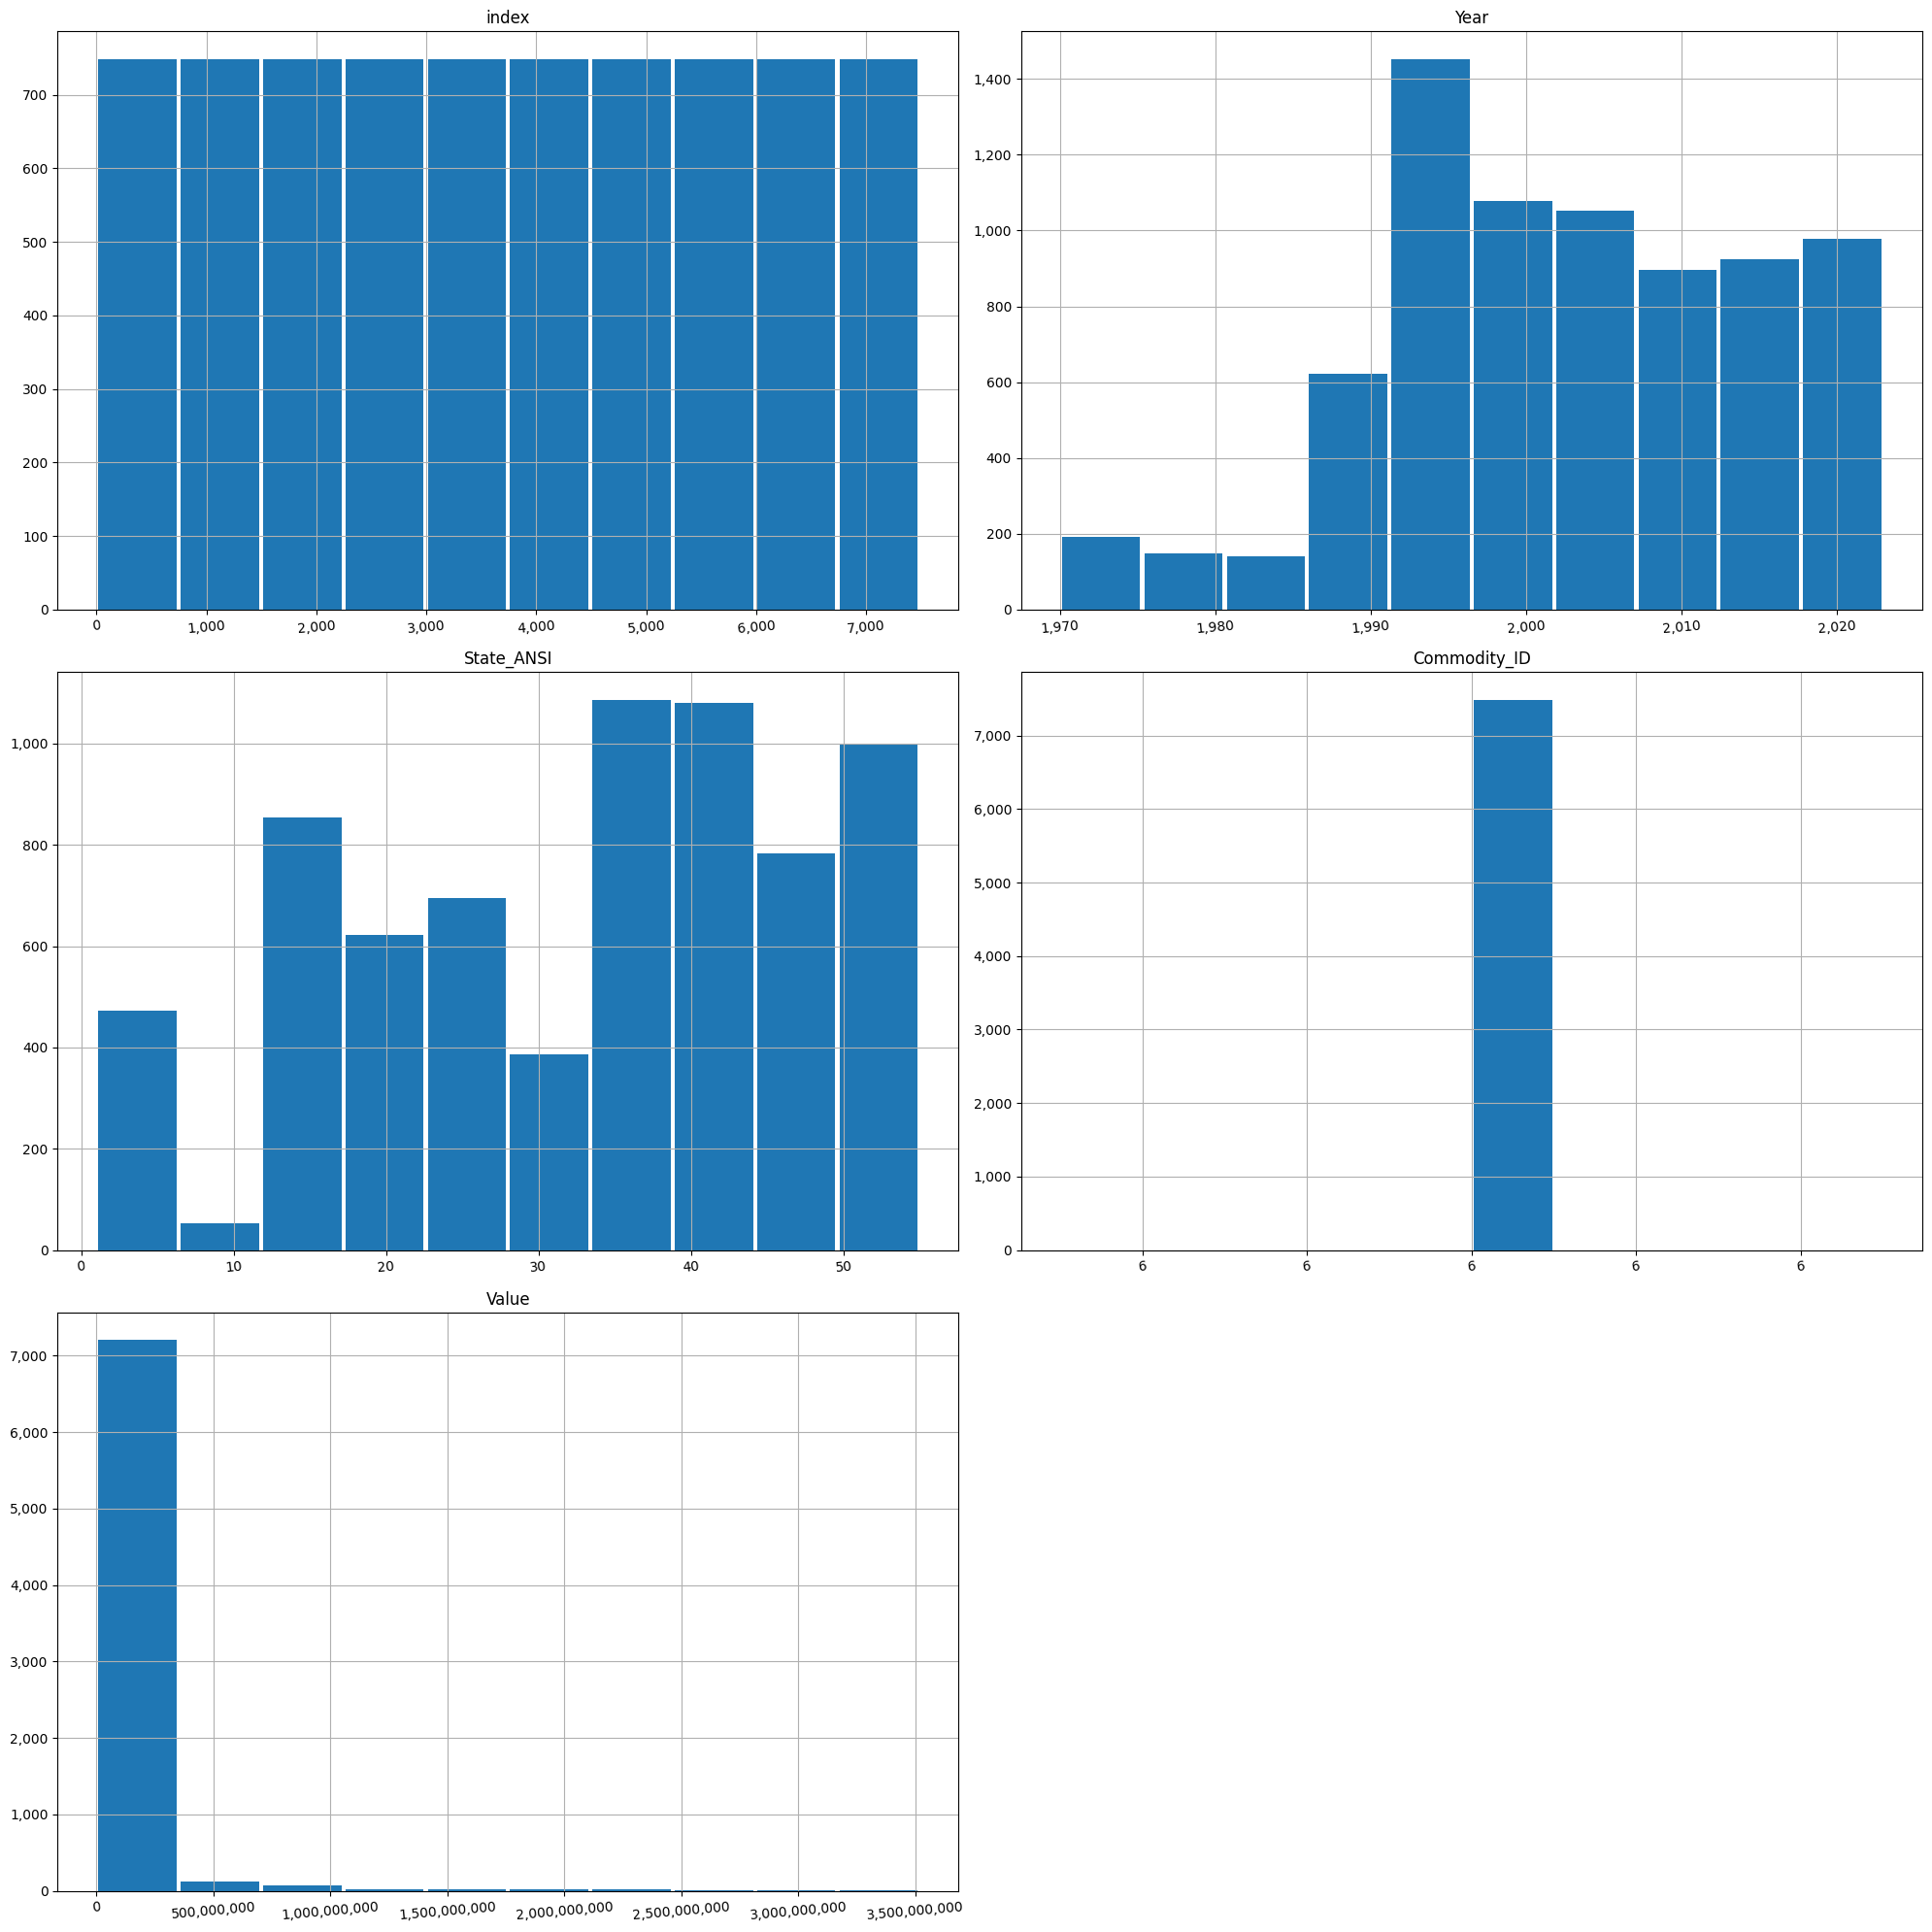

In [19]:
hi = cheese_production.hist(figsize=(20, 20), rwidth=0.95)

# Apply formatting to all axes
for a in hi.flatten():
    a.tick_params(axis='x', rotation=5)
    a.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
    a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

### 13. Sort Data by Value to Verify Distribution.

In [20]:
cheese_production[['Value', 'State_ANSI', 'Year']].sort_values(by='Value', ascending=False)

,Value,State_ANSI,Year
237,"3,520,083,000",55,2022
419,"3,492,789,000",55,2021
978,"3,422,961,000",55,2018
588,"3,389,620,000",55,2020
1173,"3,376,769,000",55,2017
...,...,...,...
5890,"35,000",8,1993
5912,"32,000",8,1993
6022,"26,000",8,1993
1546,NaN,41,2015


<Axes: >

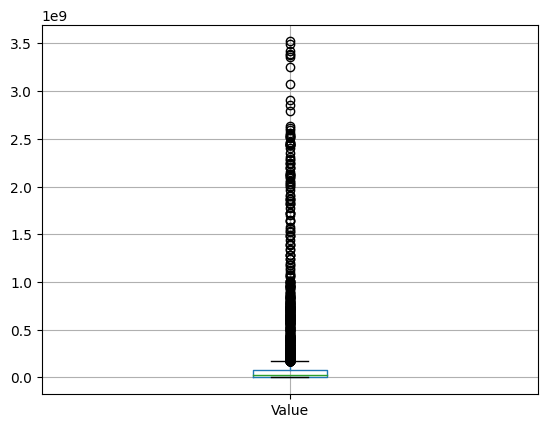

In [21]:
cheese_production.boxplot('Value')

### 14. Use PRAGMA to Check Column Data Type in SQLite query 

In [22]:
%%sql

PRAGMA table_info(cheese_production);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Year,INTEGER,0,None,0
2,Period,TEXT,0,None,0
3,Geo_Level,TEXT,0,None,0
4,State_ANSI,REAL,0,None,0
5,Commodity_ID,INTEGER,0,None,0
6,Domain,TEXT,0,None,0
7,Value,REAL,0,None,0


### 15. MODIFY SQL Table: Remove Commas, Duplicate "Value" Column as Int Column 

In [23]:
%%sql

UPDATE cheese_production 
SET value = REPLACE(value, ',', '')

 * sqlite:///farm.db
7488 rows affected.


[]

In [24]:
%%sql

ALTER TABLE cheese_production
ADD Value2 int(32)

 * sqlite:///farm.db
Done.


[]

In [25]:
%%sql

Update cheese_production
SET Value2 = Value

 * sqlite:///farm.db
7488 rows affected.


[]

In [26]:
%%sql

ALTER TABLE cheese_production
DROP COLUMN Value

 * sqlite:///farm.db
Done.


[]

In [27]:
%%sql

Select *
From cheese_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value2
0,2023,APR,STATE,6.0,6,TOTAL,208807000
1,2023,APR,STATE,16.0,6,TOTAL,86452000
2,2023,APR,STATE,17.0,6,TOTAL,5068000
3,2023,APR,STATE,19.0,6,TOTAL,31512000
4,2023,APR,STATE,27.0,6,TOTAL,69728000


In [28]:
#Note Sqlite doesn't offer a single command code that will rename columns and changing the data type

### 16. Confirm Null Values in the Value Column

In [29]:
%%sql

Select State_ANSI, Value2
From cheese_production
Where Value2 is null

 * sqlite:///farm.db
Done.


State_ANSI,Value2
41.0,None
34.0,None


## Coffee Production

### 1. Read the coffee_production CSV file and Write it to the SQL database

In [30]:
coffee_production=pd.read_csv('coffee_production.csv')

### 2. Verify SQL magic is Functioning and Load Data as a DataFrame

In [31]:
coffee_production.to_sql('coffee_production',
                         cnn,
                        if_exists= 'replace')

71

In [32]:
%%sql

Select *
From coffee_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value
0,2016,YEAR,STATE,15,1,"5,400,000"
1,2015,YEAR,STATE,15,1,"6,600,000"
2,2014,YEAR,STATE,15,1,"7,500,000"
3,2013,YEAR,STATE,15,1,"8,400,000"
4,2012,YEAR,STATE,15,1,"7,000,000"


In [33]:
result1 = %sql Select * From coffee_production
coffee_production = result1.DataFrame()

 * sqlite:///farm.db
Done.


In [34]:
coffee_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value
0,0,2016,YEAR,STATE,15,1,"5,400,000"
1,1,2015,YEAR,STATE,15,1,"6,600,000"
2,2,2014,YEAR,STATE,15,1,"7,500,000"
3,3,2013,YEAR,STATE,15,1,"8,400,000"
4,4,2012,YEAR,STATE,15,1,"7,000,000"


### 3. Check Data Type and Number of Non-Null rows. 

In [35]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         71 non-null     int64 
 1   Year          71 non-null     int64 
 2   Period        71 non-null     object
 3   Geo_Level     71 non-null     object
 4   State_ANSI    71 non-null     int64 
 5   Commodity_ID  71 non-null     int64 
 6   Value         71 non-null     object
dtypes: int64(4), object(3)
memory usage: 4.0+ KB


### 4. Check for Unique Values in each column, and Identify Duplicate Rows

In [36]:
coffee_production.nunique()

index           71
Year            71
Period           1
Geo_Level        1
State_ANSI       1
Commodity_ID     1
Value           62
dtype: int64

In [37]:
coffee_production[coffee_production.duplicated()]

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value


### 5. Confirm Null Counts

In [38]:
coffee_production.isna().sum()

index           0
Year            0
Period          0
Geo_Level       0
State_ANSI      0
Commodity_ID    0
Value           0
dtype: int64

### 6. Generate a Statistical Summary of the Data.

In [39]:
coffee_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,71,35,21,0,18,35,52,70
Year,71,"1,981",21,"1,946","1,964","1,981","1,998","2,016"
State_ANSI,71,15,0,15,15,15,15,15
Commodity_ID,71,1,0,1,1,1,1,1


### 7. Convert the Value Column to Numeric, Remove commas, and Handle Errors.

In [40]:
coffee_production['Value']= pd.to_numeric(coffee_production['Value'].str.replace(',',''), errors = 'coerce')

In [41]:
coffee_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value
0,0,2016,YEAR,STATE,15,1,5400000
1,1,2015,YEAR,STATE,15,1,6600000
2,2,2014,YEAR,STATE,15,1,7500000
3,3,2013,YEAR,STATE,15,1,8400000
4,4,2012,YEAR,STATE,15,1,7000000


In [42]:
#The describe method confirms 15 as the only State_ANSI to produce coffee.
coffee_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,71,35,21,0,18,35,52,70
Year,71,"1,981",21,"1,946","1,964","1,981","1,998","2,016"
State_ANSI,71,15,0,15,15,15,15,15
Commodity_ID,71,1,0,1,1,1,1,1
Value,71,"6,495,873","3,683,441","990,000","2,915,000","7,000,000","8,719,000","18,496,000"


In [43]:
coffee_production.to_sql('coffee_production', cnn, index=False, if_exists='replace')

71

### 8. Use the SQL Queries to Verify Max and Average Values.

In [44]:
%%sql

Select Max(Value)
From coffee_production

 * sqlite:///farm.db
Done.


Max(Value)
18496000


In [45]:
%%sql

Select AVG(Value)
From coffee_production

 * sqlite:///farm.db
Done.


AVG(Value)
6495873.23943662


### 9. Create a Histogram and Box Plot to Identify Outliers. 

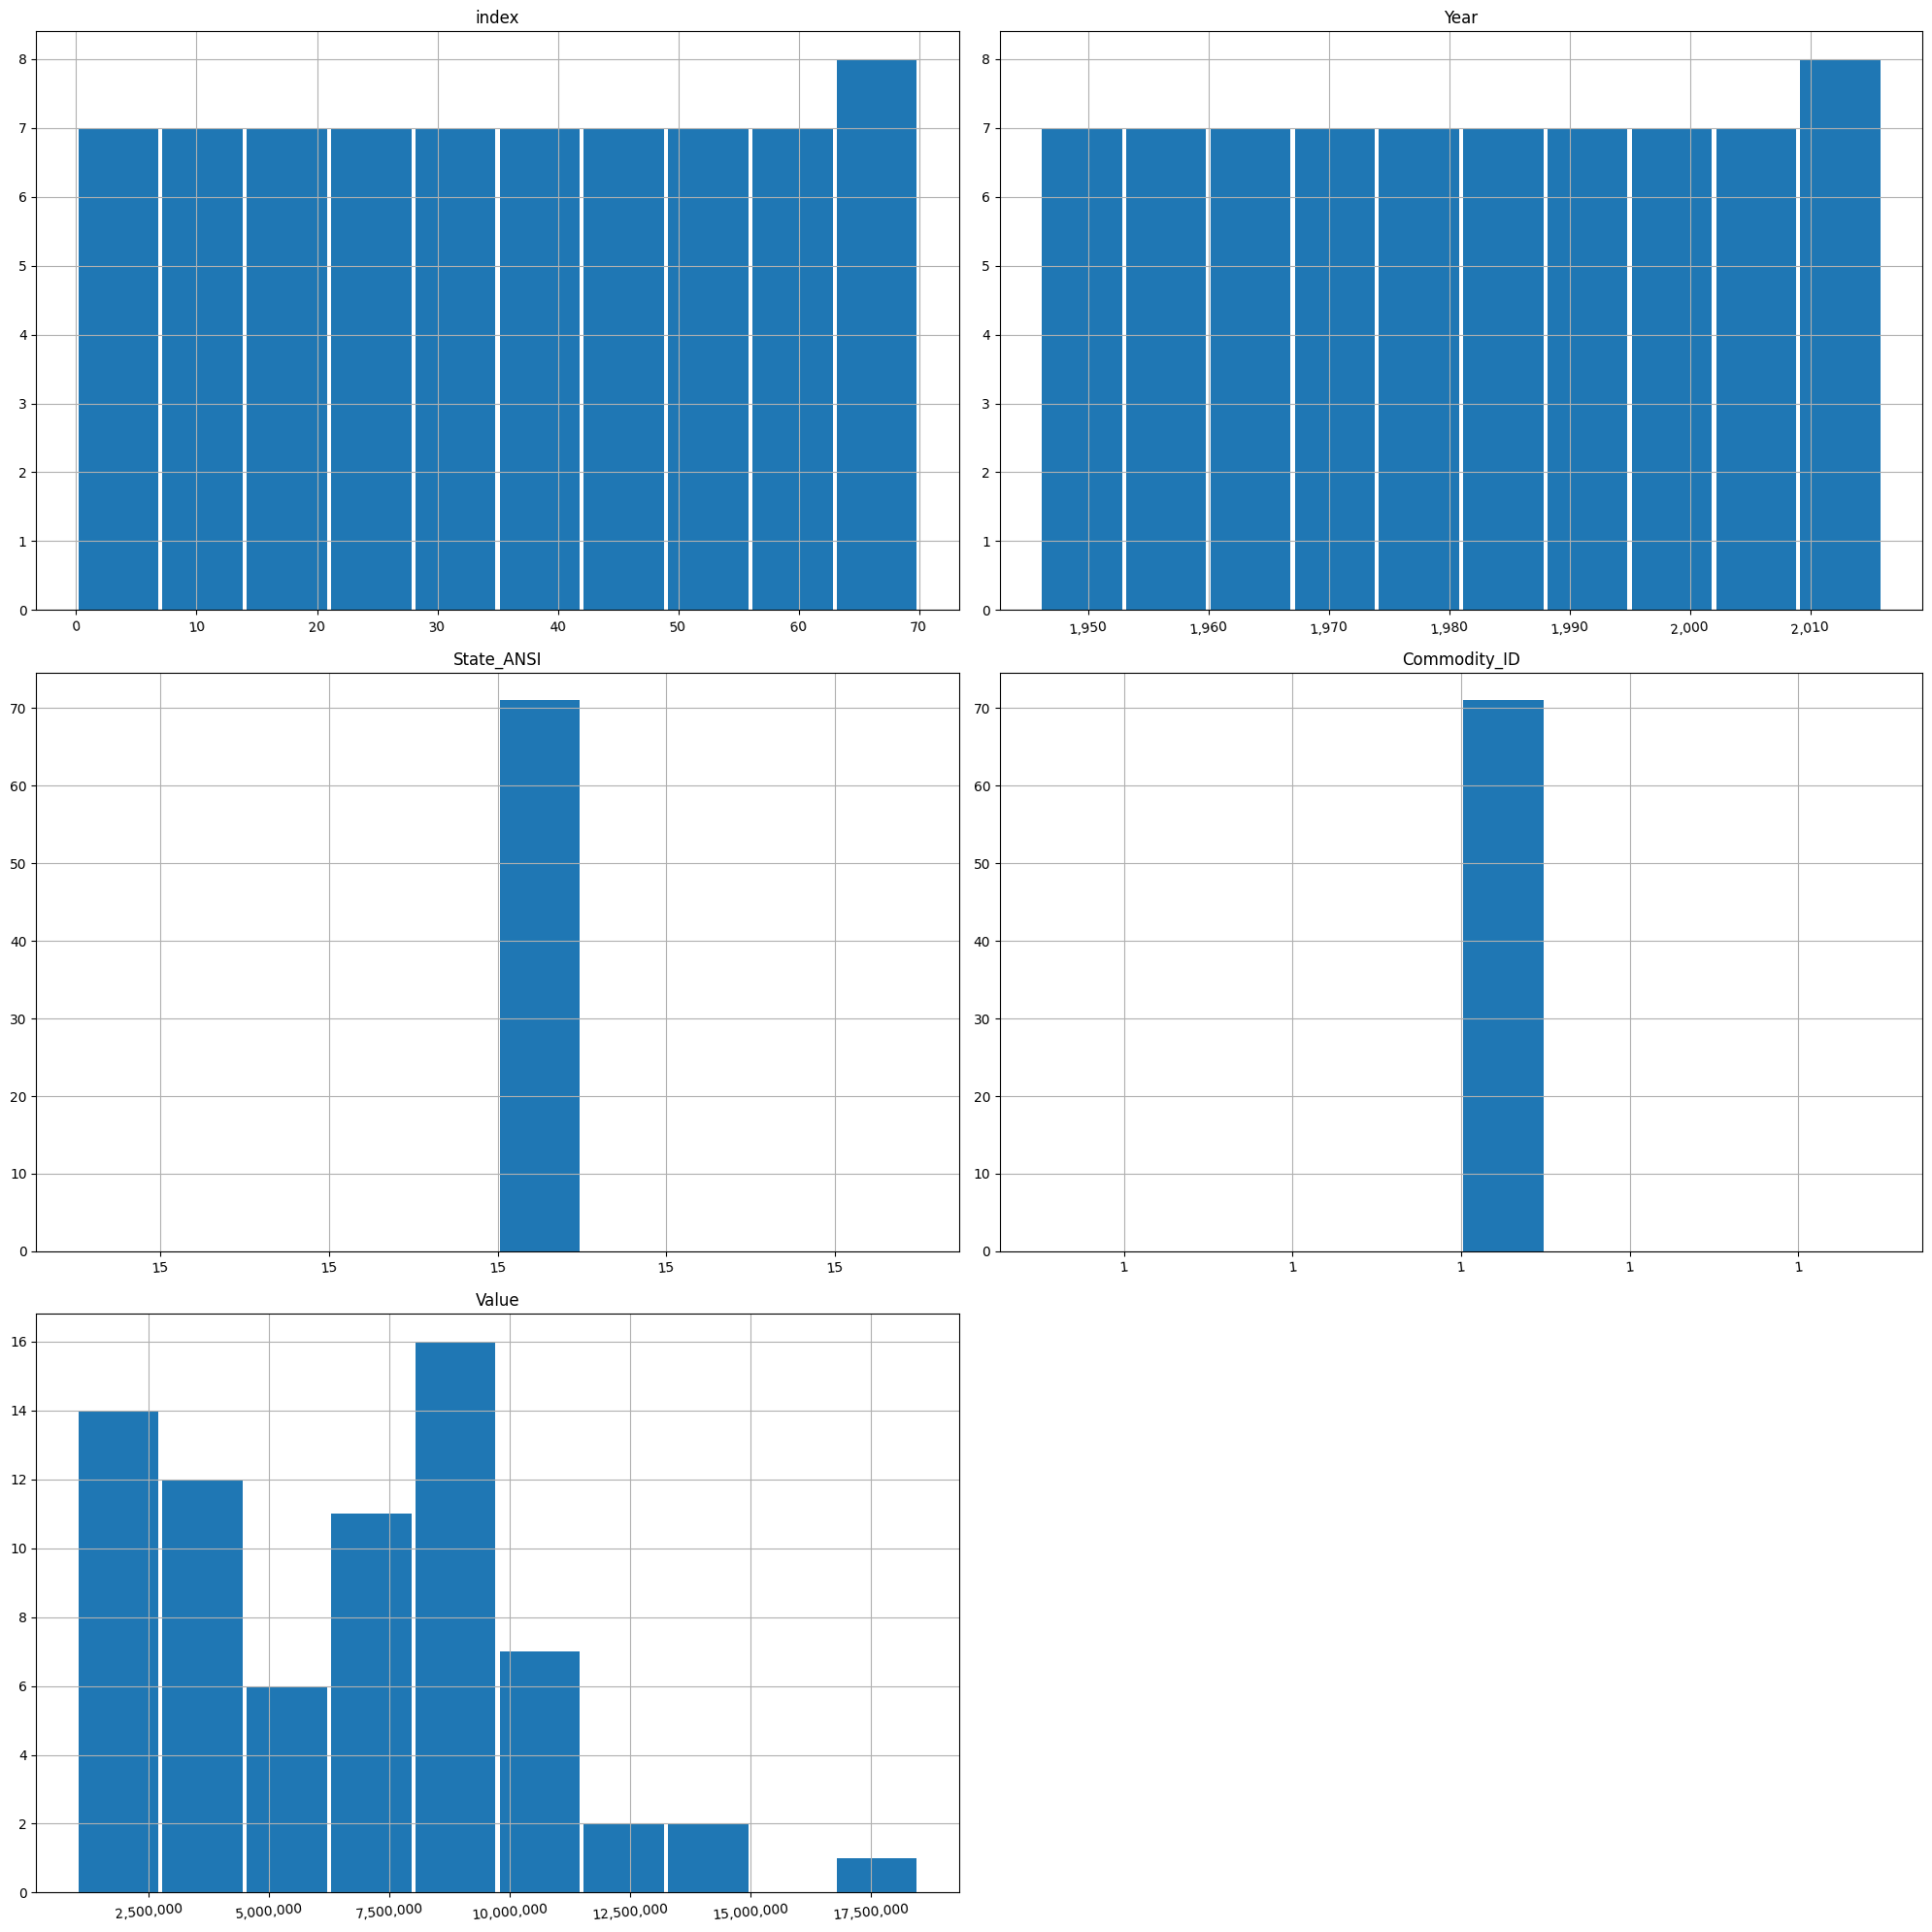

In [46]:
his = coffee_production.hist(figsize=(20, 20), rwidth=0.95)

# Apply formatting to all axes
for a in his.flatten():
    a.tick_params(axis='x', rotation=5)
    a.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
    a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

### 10. Sort Data by Value to Verify Distribution.

In [47]:
coffee_production[['Value', 'State_ANSI', 'Year']].sort_values(by='Value', ascending=False)

,Value,State_ANSI,Year
59,18496000,15,1957
54,13392000,15,1962
56,13272000,15,1960
57,12999000,15,1959
62,12425000,15,1954
...,...,...,...
32,1750000,15,1984
38,1680000,15,1978
42,1540000,15,1974
36,1440000,15,1980


<Axes: >

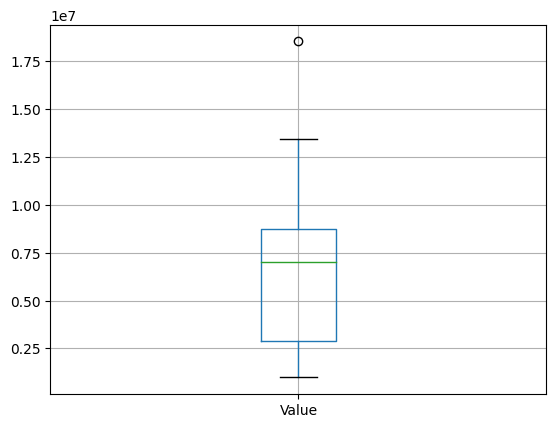

In [48]:
coffee_production.boxplot('Value')

### 11.Use PRAGMA to Check Column Data Type in SQLite query 

In [49]:
%%sql

PRAGMA table_info(coffee_production);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Year,INTEGER,0,None,0
2,Period,TEXT,0,None,0
3,Geo_Level,TEXT,0,None,0
4,State_ANSI,INTEGER,0,None,0
5,Commodity_ID,INTEGER,0,None,0
6,Value,INTEGER,0,None,0


### 12. Confirm Null Values in the Value Column

In [50]:
%%sql

Select *
From coffee_production
WHERE Value is null

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value


## Egg Production

### 1. Read the egg_production CSV File and Write it to the SQL database

In [51]:
egg_production=pd.read_csv('egg_production.csv')

In [52]:
egg_production.to_sql('egg_production',
                         cnn,
                        if_exists= 'replace')

6327

### 2. Verify SQL magic is Functioning and Load Data as a DataFrame

In [53]:
%%sql 

Select * 

From egg_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value
0,2023,APR,STATE,1.0,7,"224,100,000"
1,2023,APR,STATE,5.0,7,"319,000,000"
2,2023,APR,STATE,6.0,7,"271,300,000"
3,2023,APR,STATE,8.0,7,"52,200,000"
4,2023,APR,STATE,13.0,7,"437,800,000"


In [54]:
result2 = %sql Select * From egg_production
egg_production = result2.DataFrame()

 * sqlite:///farm.db
Done.


In [55]:
egg_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value
0,0,2023,APR,STATE,1,7,"224,100,000"
1,1,2023,APR,STATE,5,7,"319,000,000"
2,2,2023,APR,STATE,6,7,"271,300,000"
3,3,2023,APR,STATE,8,7,"52,200,000"
4,4,2023,APR,STATE,13,7,"437,800,000"


### 3. Check Data Type and Number of Non-Null rows. 

In [56]:
egg_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         6327 non-null   int64  
 1   Year          6327 non-null   int64  
 2   Period        6327 non-null   object 
 3   Geo_Level     6327 non-null   object 
 4   State_ANSI    6126 non-null   float64
 5   Commodity_ID  6327 non-null   int64  
 6   Value         6327 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 346.1+ KB


### 4. Check for Unique Values in each column, and Identify Duplicate Rows

In [57]:
egg_production.nunique()

index           6327
Year              80
Period            14
Geo_Level          1
State_ANSI        41
Commodity_ID       1
Value           3590
dtype: int64

In [58]:
egg_production[egg_production.duplicated()]

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value


### 5. Confirm Null Counts

In [59]:
egg_production.isna().sum()

index             0
Year              0
Period            0
Geo_Level         0
State_ANSI      201
Commodity_ID      0
Value             0
dtype: int64

### 6. Generate a Statistical Summary of the Data.

In [60]:
egg_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"6,327","3,163","1,827",0,"1,582","3,163","4,744","6,326"
Year,"6,327","2,013",9,"1,944","2,011","2,015","2,019","2,023"
State_ANSI,"6,126",30,16,1,17,29,45,56
Commodity_ID,"6,327",7,0,7,7,7,7,7


### 7. Convert the Value Column to Numeric, Remove commas, and Handle Errors.

In [61]:
egg_production['Value']= pd.to_numeric(egg_production['Value'].str.replace(',',''), errors = 'coerce')

In [62]:
egg_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Value
0,0,2023,APR,STATE,1,7,"224,100,000"
1,1,2023,APR,STATE,5,7,"319,000,000"
2,2,2023,APR,STATE,6,7,"271,300,000"
3,3,2023,APR,STATE,8,7,"52,200,000"
4,4,2023,APR,STATE,13,7,"437,800,000"


In [63]:
egg_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"6,327","3,163","1,827",0,"1,582","3,163","4,744","6,326"
Year,"6,327","2,013",9,"1,944","2,011","2,015","2,019","2,023"
State_ANSI,"6,126",30,16,1,17,29,45,56
Commodity_ID,"6,327",7,0,7,7,7,7,7
Value,"6,314","599,747,245","1,295,373,229","2,400,000","111,200,000","228,950,000","533,750,000","17,083,800,000"


### 8. Use the SQL Queries to Verify Max and Average Values.

In [64]:
%%sql

Select Max(Value)
From egg_production

 * sqlite:///farm.db
Done.


Max(Value)
"999,900,000"


In [65]:
%%sql

Select AVG(Value)
From egg_production

 * sqlite:///farm.db
Done.


AVG(Value)
237.20957799905167


In [66]:
egg_production.to_sql('egg_production', cnn, index=False, if_exists='replace')

6327

### 9. Create a Histogram and Box Plot to Identify Outliers. 

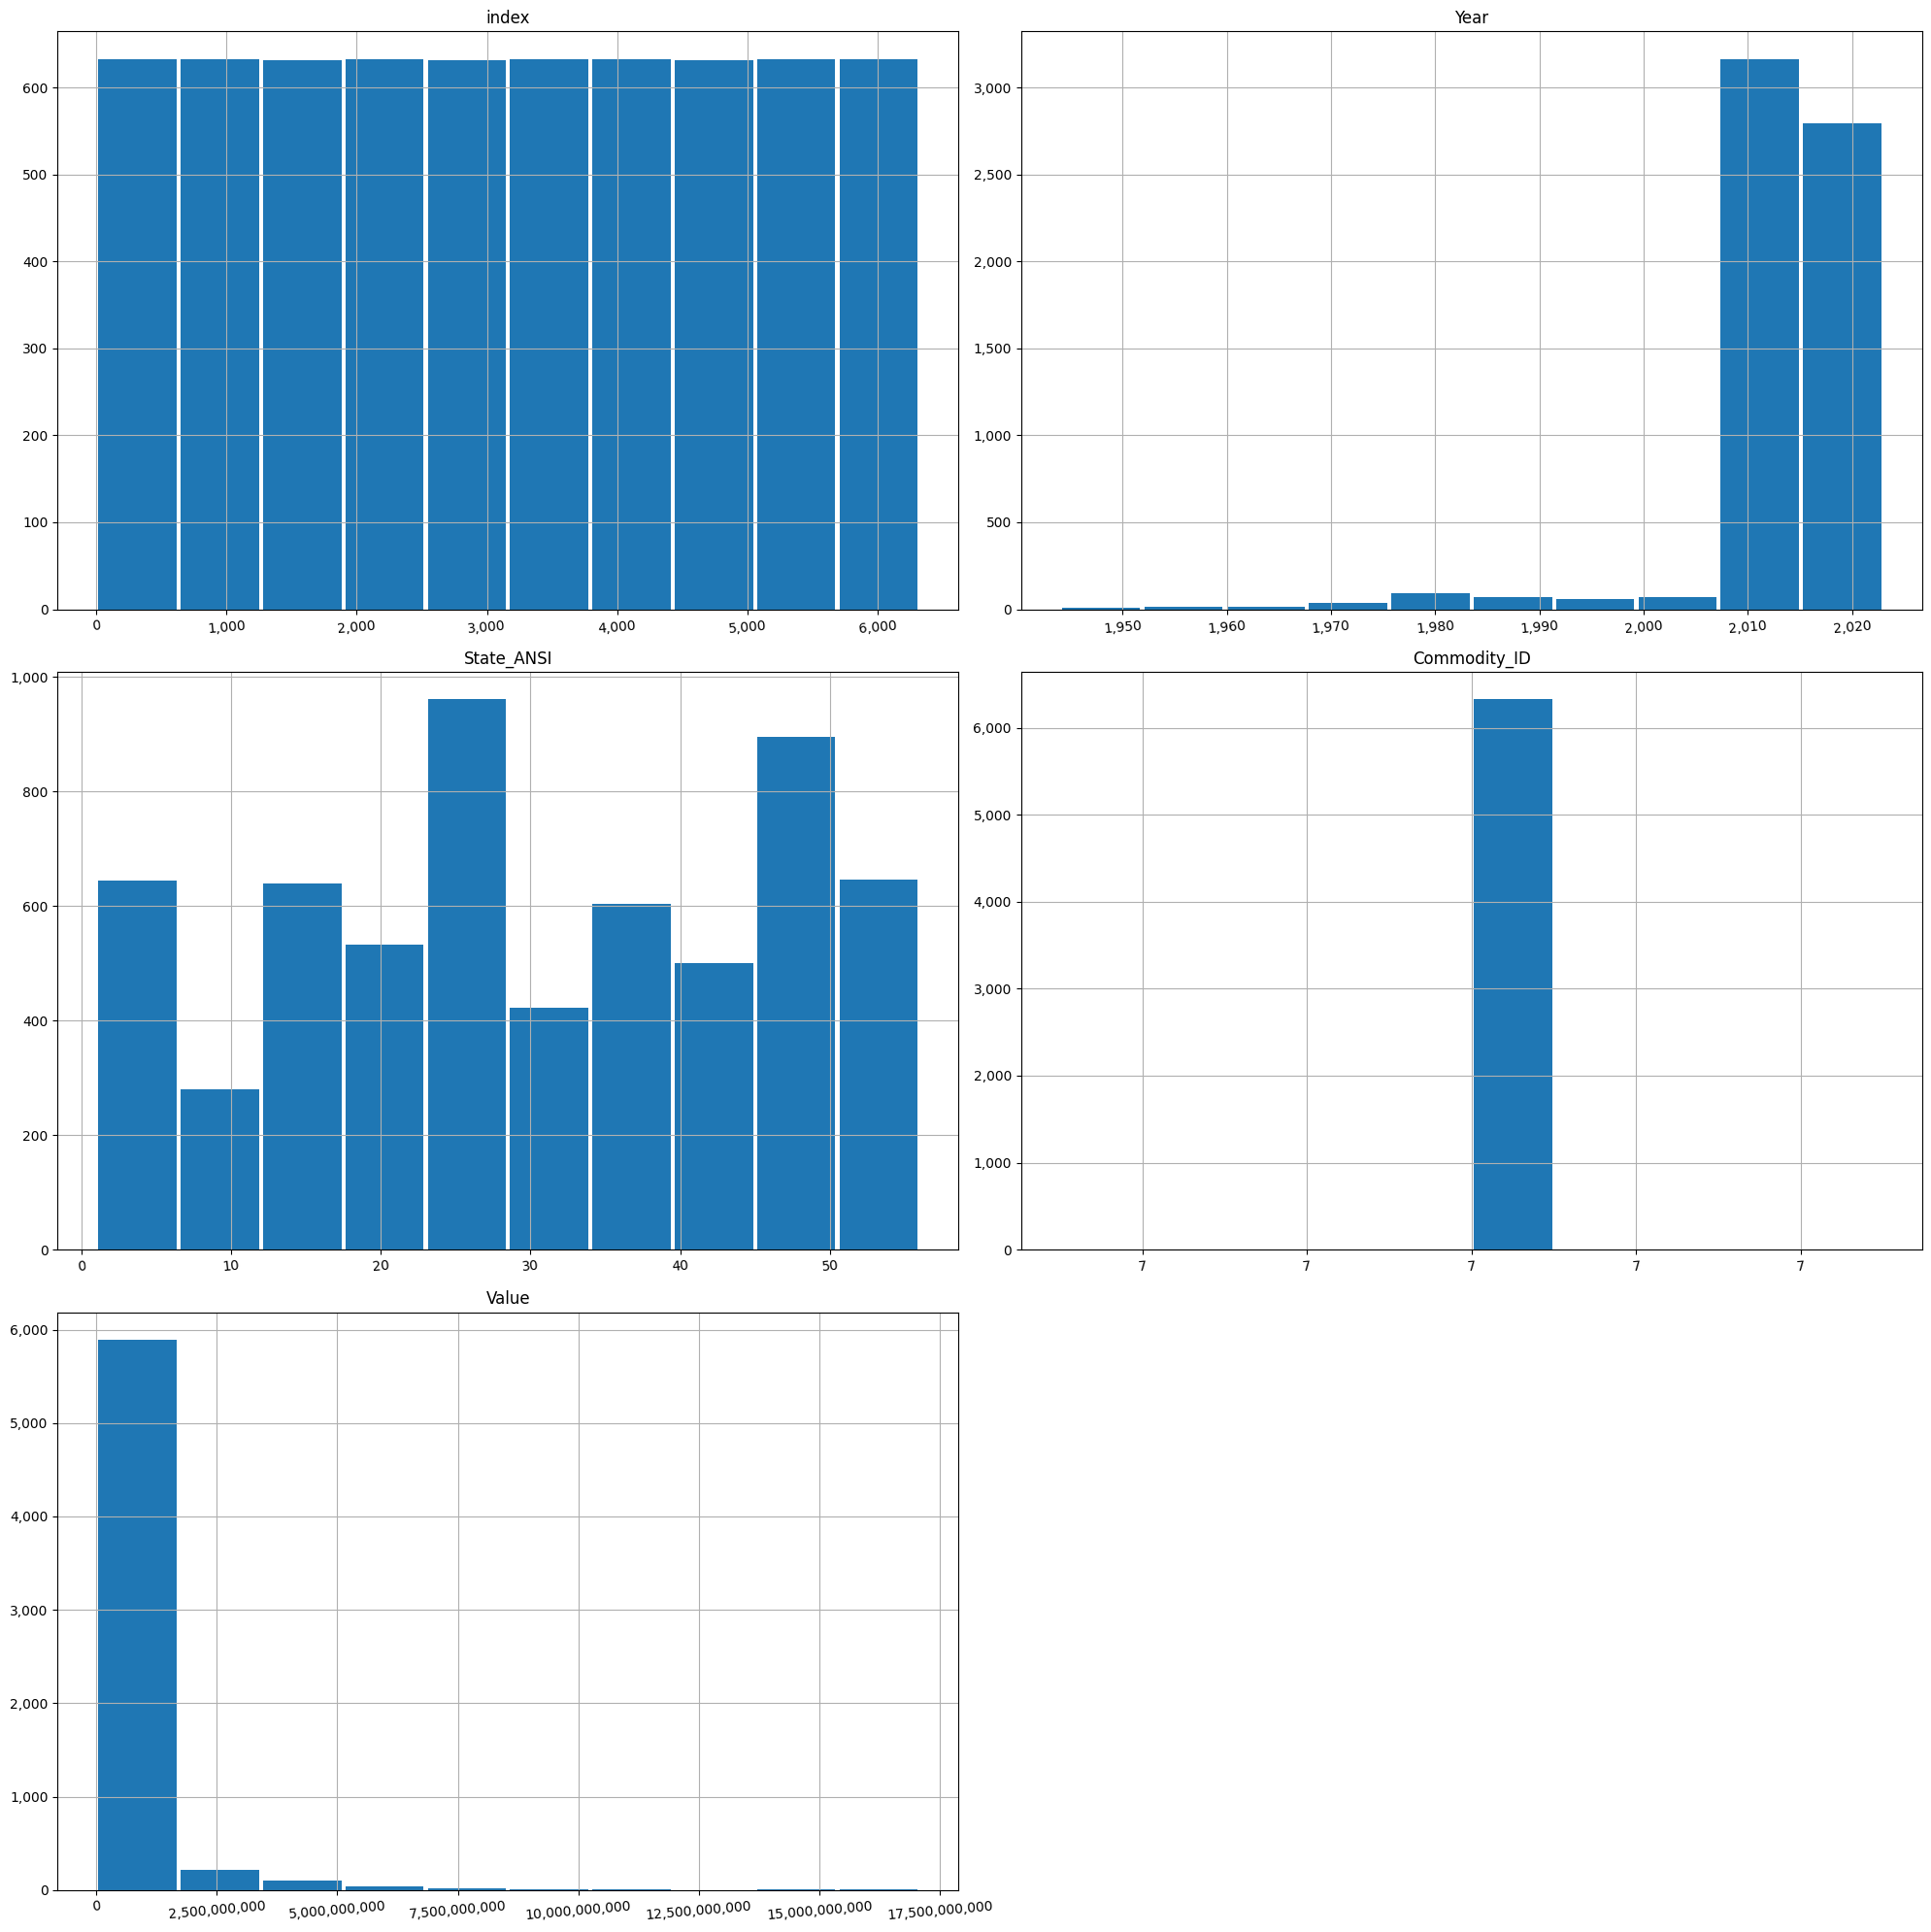

In [67]:
hist = egg_production.hist(figsize=(20, 20), rwidth=0.95)

# Apply formatting to all axes
for a in hist.flatten():
    a.tick_params(axis='x', rotation=5)
    a.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
    a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

### 10. Sort Data by Value to Verify Distribution.

In [68]:
egg_production[['Value', 'State_ANSI', 'Year']].sort_values(by='Value', ascending=False)

,Value,State_ANSI,Year
1533,"17,083,800,000",19,2019
3398,"16,513,000,000",19,2014
2282,"16,155,200,000",19,2017
3787,"16,155,100,000",19,2013
1910,"16,119,300,000",19,2018
...,...,...,...
4629,NaN,15,2011
4660,NaN,15,2011
4691,NaN,15,2011
4722,NaN,15,2011


<Axes: >

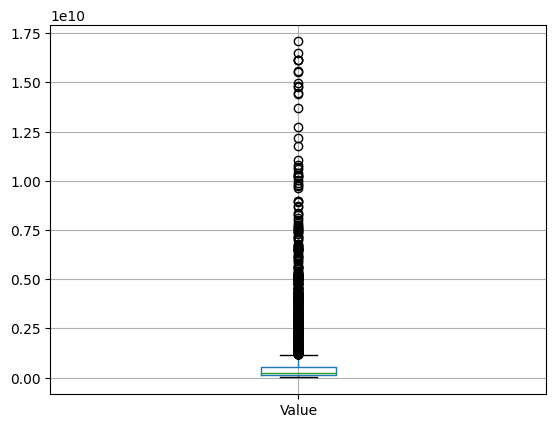

In [69]:
egg_production.boxplot('Value')

### 11. Use PRAGMA to Check Column Data Type in SQLite query 

In [70]:
%%sql

PRAGMA table_info(egg_production);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Year,INTEGER,0,None,0
2,Period,TEXT,0,None,0
3,Geo_Level,TEXT,0,None,0
4,State_ANSI,REAL,0,None,0
5,Commodity_ID,INTEGER,0,None,0
6,Value,REAL,0,None,0


### 12. Confirm Null Values in the Value Column

In [71]:
%%sql

Select Period, Year, State_ANSI, Value
From egg_production
Where Value is null

 * sqlite:///farm.db
Done.


Period,Year,State_ANSI,Value
APR,2011,15.0,None
AUG,2011,15.0,None
FEB,2011,15.0,None
JAN,2011,15.0,None
JUL,2011,15.0,None
JUN,2011,15.0,None
MAR,2011,15.0,None
MARKETING YEAR,2011,15.0,None
MAY,2011,15.0,None
NOV,2011,15.0,None


## Honey Production

### 1. Read the honey_production CSV file and write it to the SQL database

In [72]:
honey_production=pd.read_csv('honey_production.csv')

In [73]:
honey_production.to_sql('honey_production',
                         cnn,
                        if_exists= 'replace')

1559

### 2. Verify SQL magic is Functioning and Load Data as a DataFrame

In [74]:
%%sql 

Select * 
From honey_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Geo_Level,State_ANSI,Commodity_ID,Value
0,2022,STATE,1.0,2,"400,000"
1,2022,STATE,4.0,2,"1,035,000"
2,2022,STATE,5.0,2,"1,120,000"
3,2022,STATE,6.0,2,"11,590,000"
4,2022,STATE,8.0,2,"1,302,000"


In [75]:
result3 = %sql Select * From honey_production
honey_production = result3.DataFrame()


 * sqlite:///farm.db
Done.


In [76]:
honey_production.head()

,index,Year,Geo_Level,State_ANSI,Commodity_ID,Value
0,0,2022,STATE,1,2,"400,000"
1,1,2022,STATE,4,2,"1,035,000"
2,2,2022,STATE,5,2,"1,120,000"
3,3,2022,STATE,6,2,"11,590,000"
4,4,2022,STATE,8,2,"1,302,000"


### 3. Check Data Type and Number of Non-Null rows. 

In [77]:
honey_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1559 non-null   int64  
 1   Year          1559 non-null   int64  
 2   Geo_Level     1559 non-null   object 
 3   State_ANSI    1527 non-null   float64
 4   Commodity_ID  1559 non-null   int64  
 5   Value         1559 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 73.2+ KB


### 4. Check for Unique Values in each column, and Identify Duplicate Rows

In [78]:
honey_production.nunique()

index           1559
Year              36
Geo_Level          1
State_ANSI        49
Commodity_ID       1
Value           1068
dtype: int64

In [79]:
honey_production[honey_production.duplicated()]

,index,Year,Geo_Level,State_ANSI,Commodity_ID,Value


### 5. Confirm Null Counts

In [80]:
honey_production.isna().sum()

index            0
Year             0
Geo_Level        0
State_ANSI      32
Commodity_ID     0
Value            0
dtype: int64

### 6. Generate a Statistical Summary of the Data.

In [81]:
honey_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"1,559",779,450,0,390,779,"1,168","1,558"
Year,"1,559","2,004",10,"1,987","1,995","2,004","2,013","2,022"
State_ANSI,"1,527",30,16,1,18,30,44,56
Commodity_ID,"1,559",2,0,2,2,2,2,2


### 7. Convert the Value Column to Numeric, Remove commas, and Handle Errors.

In [82]:
honey_production['Value']= pd.to_numeric(honey_production['Value'].str.replace(',',''), errors = 'coerce')

In [83]:
honey_production.head()

,index,Year,Geo_Level,State_ANSI,Commodity_ID,Value
0,0,2022,STATE,1,2,400000
1,1,2022,STATE,4,2,1035000
2,2,2022,STATE,5,2,1120000
3,3,2022,STATE,6,2,11590000
4,4,2022,STATE,8,2,1302000


In [84]:
honey_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"1,559",779,450,0,390,779,"1,168","1,558"
Year,"1,559","2,004",10,"1,987","1,995","2,004","2,013","2,022"
State_ANSI,"1,527",30,16,1,18,30,44,56
Commodity_ID,"1,559",2,0,2,2,2,2,2
Value,"1,559","4,146,268","6,709,822","10,000","511,000","1,570,000","4,135,000","46,410,000"


In [85]:
honey_production.to_sql('honey_production', cnn, index=False, if_exists='replace')

1559

### 8. Use the SQL Queries to Verify Max and Average Values.

In [86]:
%%sql

Select Max(Value)
From honey_production

 * sqlite:///farm.db
Done.


Max(Value)
46410000


In [87]:
%%sql

Select AVG(Value)
From honey_production

 * sqlite:///farm.db
Done.


AVG(Value)
4146268.120590122


### 9. Create a Histogram and Box Plot to Identify Outliers. 

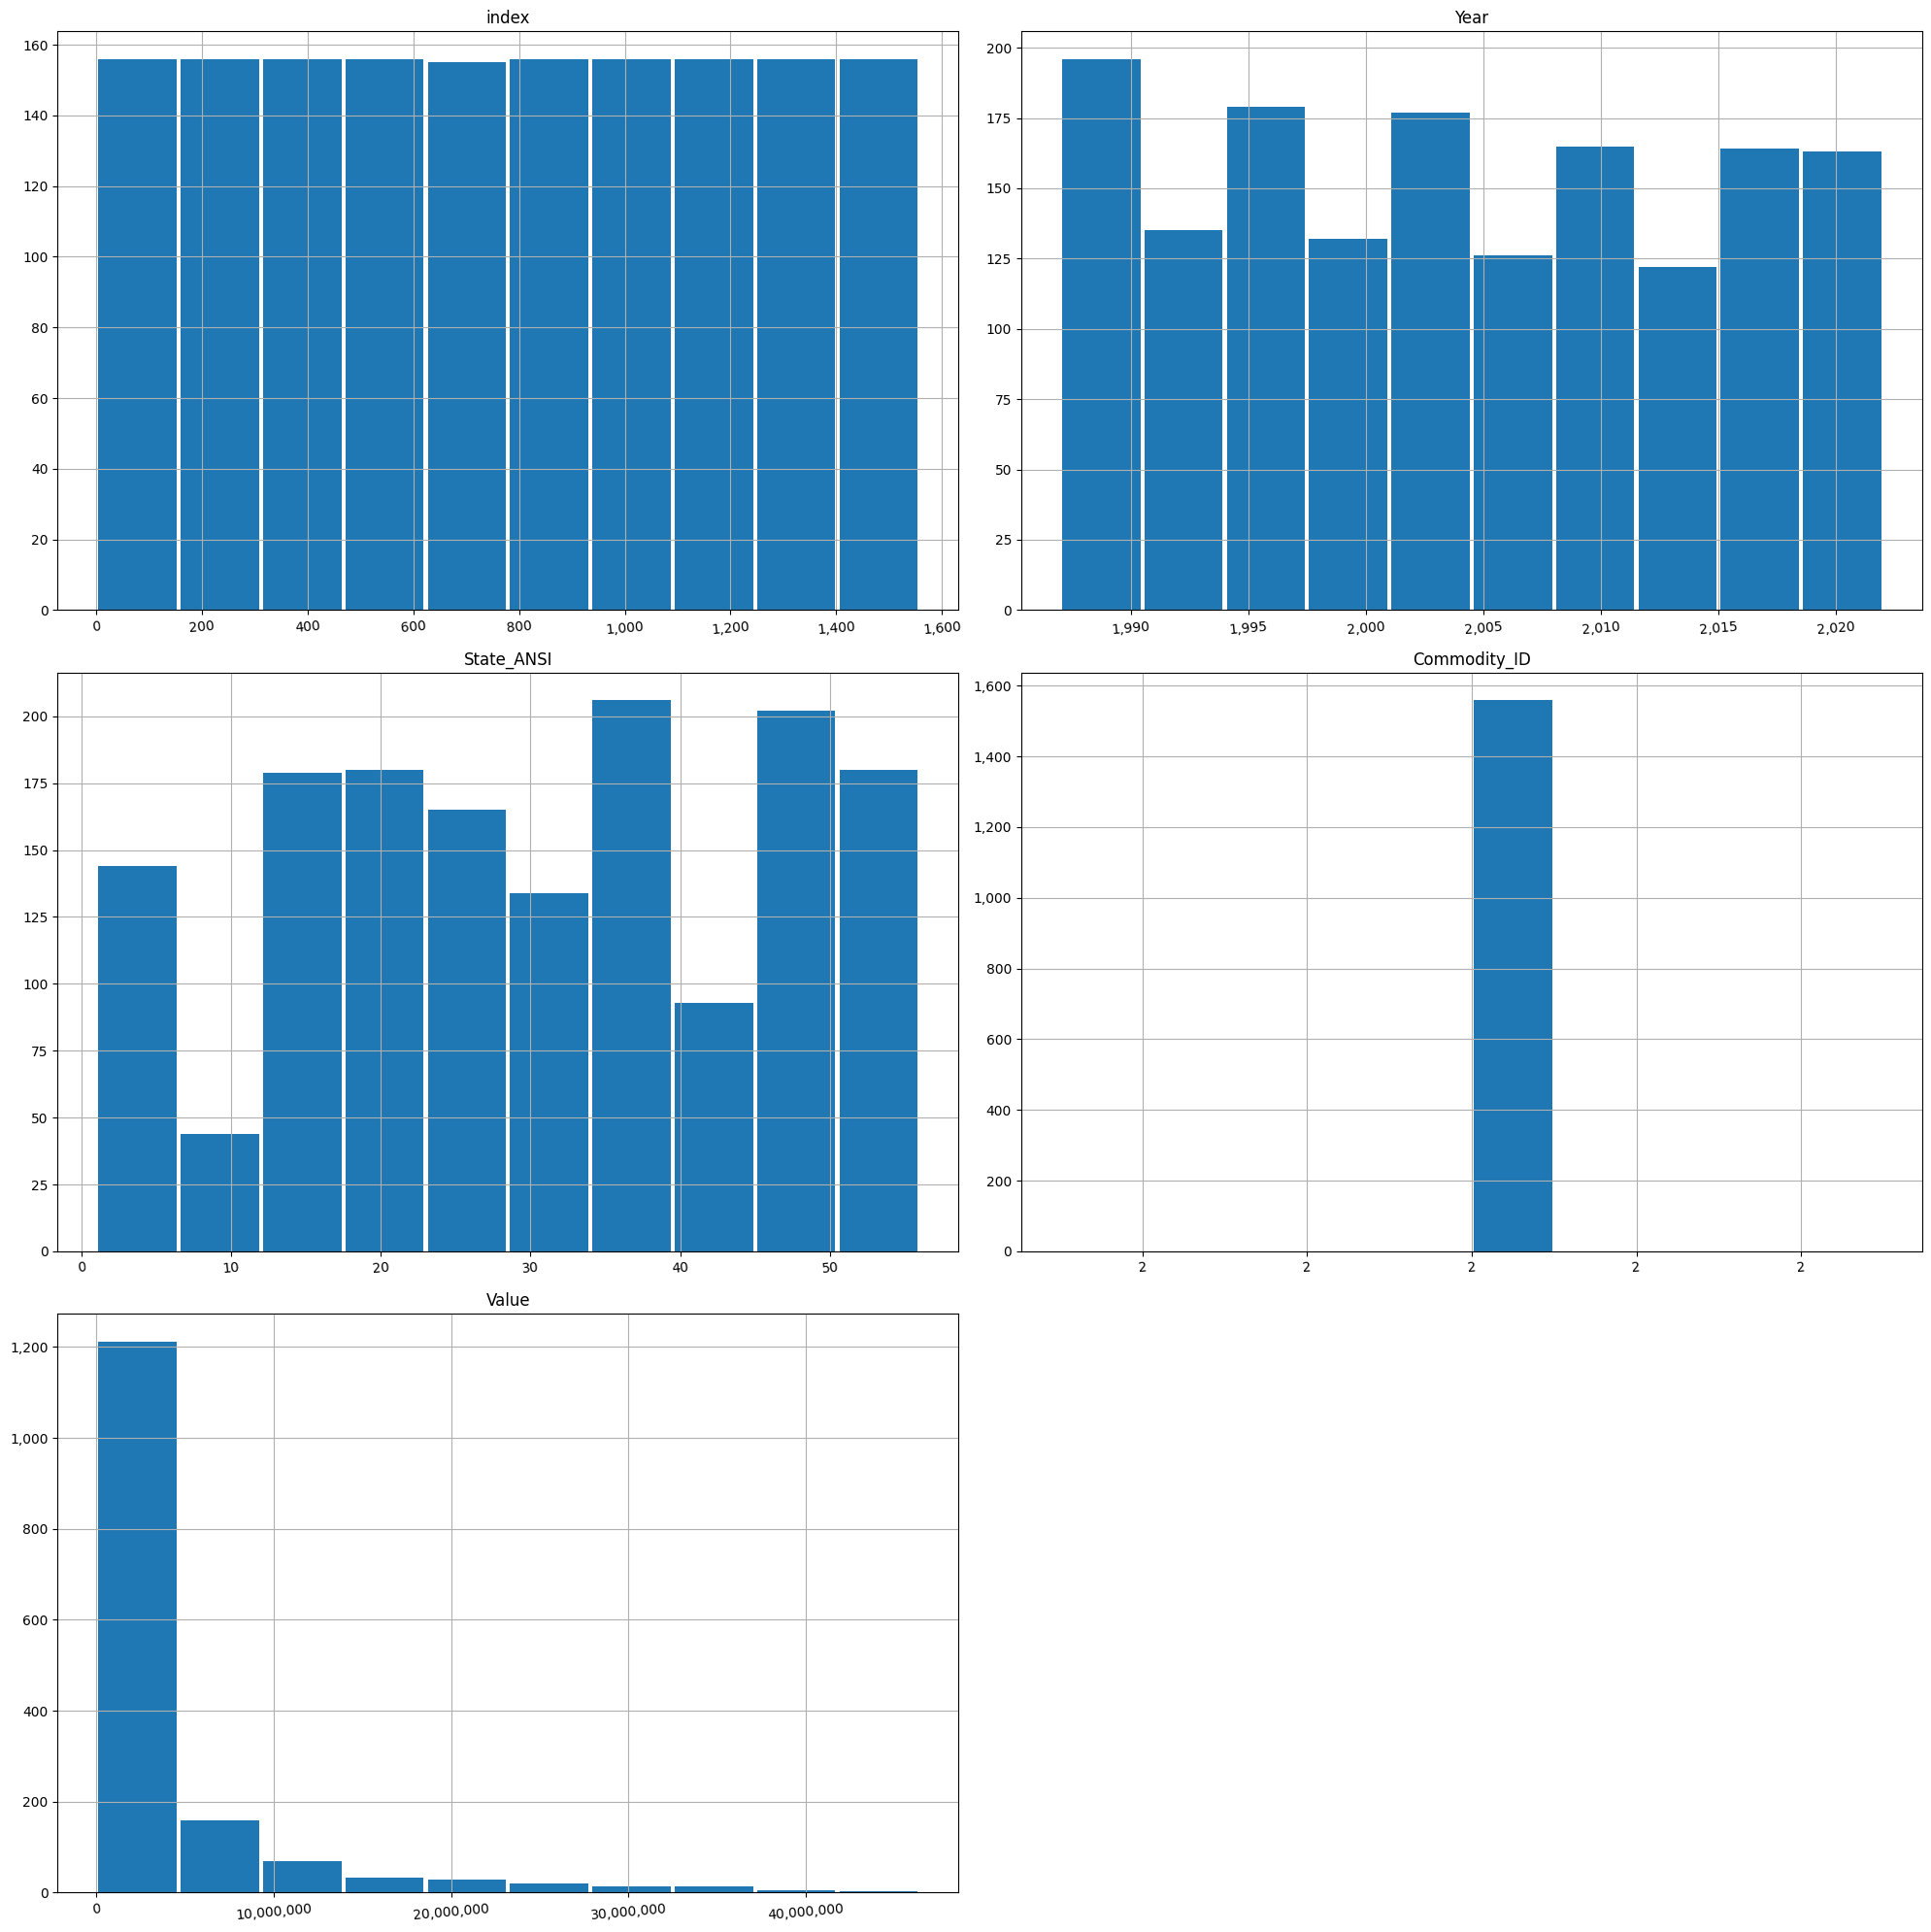

In [88]:
histo = honey_production.hist(figsize=(20, 20), rwidth=0.95)

# Apply formatting to all axes
for a in histo.flatten():
    a.tick_params(axis='x', rotation=5)
    a.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
    a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

### 10.  Sort Data by Value to Verify Distribution.

In [89]:
honey_production[['Value', 'State_ANSI', 'Year']].sort_values(by='Value', ascending=False)

,Value,State_ANSI,Year
516,46410000,38,2010
1231,45000000,6,1993
352,42140000,38,2014
188,39600000,38,2018
1141,39060000,6,1995
...,...,...,...
1400,31000,44,1990
1516,29000,10,1987
1467,26000,10,1988
1369,11000,10,1990


<Axes: >

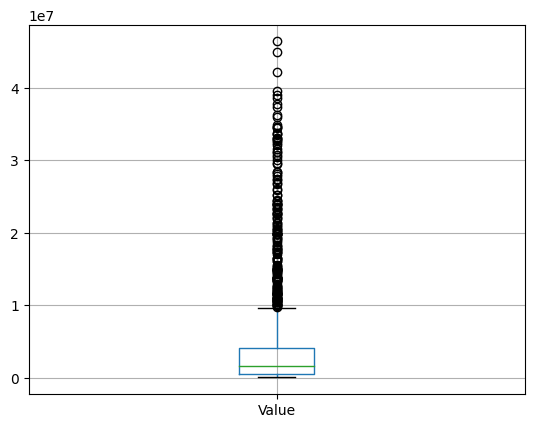

In [90]:
honey_production.boxplot('Value')

### 11. Use PRAGMA to Check Column Data Type in SQLite query 

In [91]:
%%sql

PRAGMA table_info(honey_production);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Year,INTEGER,0,None,0
2,Geo_Level,TEXT,0,None,0
3,State_ANSI,REAL,0,None,0
4,Commodity_ID,INTEGER,0,None,0
5,Value,INTEGER,0,None,0


### 12. Confirm Null Values in the Value Column

In [92]:
%%sql

Select 
    Year, State_ANSI, Value
From honey_production
Where Value is null

 * sqlite:///farm.db
Done.


Year,State_ANSI,Value


## Milk Production

### 1. Read the milk_production CSV file and Write it to the SQL database

In [93]:
milk_production=pd.read_csv('milk_production.csv')

In [94]:
milk_production.to_sql('milk_production',
                         cnn,
                        if_exists= 'replace')

37638

### 2. Verify SQL magic is Functioning and Load Data as a DataFrame

In [95]:
%%sql 

Select * 

From milk_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,2023,APR,STATE,4.0,5,TOTAL,"428,000,000"
1,2023,APR,STATE,6.0,5,TOTAL,"3,543,000,000"
2,2023,APR,STATE,8.0,5,TOTAL,"444,000,000"
3,2023,APR,STATE,12.0,5,TOTAL,"166,000,000"
4,2023,APR,STATE,13.0,5,TOTAL,"180,000,000"


In [96]:
result4 = %sql Select * From milk_production
milk_production = result4.DataFrame()

 * sqlite:///farm.db
Done.


In [97]:
milk_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,0,2023,APR,STATE,4,5,TOTAL,"428,000,000"
1,1,2023,APR,STATE,6,5,TOTAL,"3,543,000,000"
2,2,2023,APR,STATE,8,5,TOTAL,"444,000,000"
3,3,2023,APR,STATE,12,5,TOTAL,"166,000,000"
4,4,2023,APR,STATE,13,5,TOTAL,"180,000,000"


### 3. Check Data Type and Number of Non-Null rows. 

In [98]:
milk_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37638 entries, 0 to 37637
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         37638 non-null  int64  
 1   Year          37638 non-null  int64  
 2   Period        37638 non-null  object 
 3   Geo_Level     37638 non-null  object 
 4   State_ANSI    37634 non-null  float64
 5   Commodity_ID  37638 non-null  int64  
 6   Domain        37638 non-null  object 
 7   Value         37638 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.3+ MB


### 4. Check for Unique Values in each column, and Identify Duplicate Rows

In [99]:
milk_production.nunique()

index           37638
Year              100
Period             13
Geo_Level           1
State_ANSI         50
Commodity_ID        1
Domain              1
Value            4000
dtype: int64

In [100]:
milk_production[milk_production.duplicated()]

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value


### 5. Confirm Null Counts

In [101]:
milk_production.isna().sum()

index           0
Year            0
Period          0
Geo_Level       0
State_ANSI      4
Commodity_ID    0
Domain          0
Value           0
dtype: int64

### 6. Generate a Statistical Summary of the Data.

In [102]:
milk_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"37,638","18,818","10,865",0,"9,409","18,818","28,228","37,637"
Year,"37,638","1,973",26,"1,924","1,953","1,970","1,993","2,023"
State_ANSI,"37,634",30,16,1,18,30,45,56
Commodity_ID,"37,638",5,0,5,5,5,5,5


### 7. Convert the Value Column to Numeric, Remove commas, and Handle Errors.

In [103]:
milk_production['Value']= pd.to_numeric(milk_production['Value'].str.replace(',',''), errors = 'coerce')

In [104]:
milk_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,0,2023,APR,STATE,4,5,TOTAL,428000000
1,1,2023,APR,STATE,6,5,TOTAL,3543000000
2,2,2023,APR,STATE,8,5,TOTAL,444000000
3,3,2023,APR,STATE,12,5,TOTAL,166000000
4,4,2023,APR,STATE,13,5,TOTAL,180000000


In [105]:
milk_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,"37,638","18,818","10,865",0,"9,409","18,818","28,228","37,637"
Year,"37,638","1,973",26,"1,924","1,953","1,970","1,993","2,023"
State_ANSI,"37,634",30,16,1,18,30,45,56
Commodity_ID,"37,638",5,0,5,5,5,5,5
Value,"37,638","677,995,725","1,915,420,285","1,210,000","110,000,000","212,000,000","555,000,000","42,339,000,000"


In [106]:
milk_production.to_sql('milk_production', cnn, index=False, if_exists='replace')

37638

### 8. Use the SQL Queries to Verify Max and Average Values.

In [107]:
%%sql

Select Max(Value)
From milk_production

 * sqlite:///farm.db
Done.


Max(Value)
42339000000


In [108]:
%%sql

Select AVG(Value)
From milk_production

 * sqlite:///farm.db
Done.


AVG(Value)
677995725.0650938


### 9. Create a Histogram and Box Plot to Identify Outliers. 

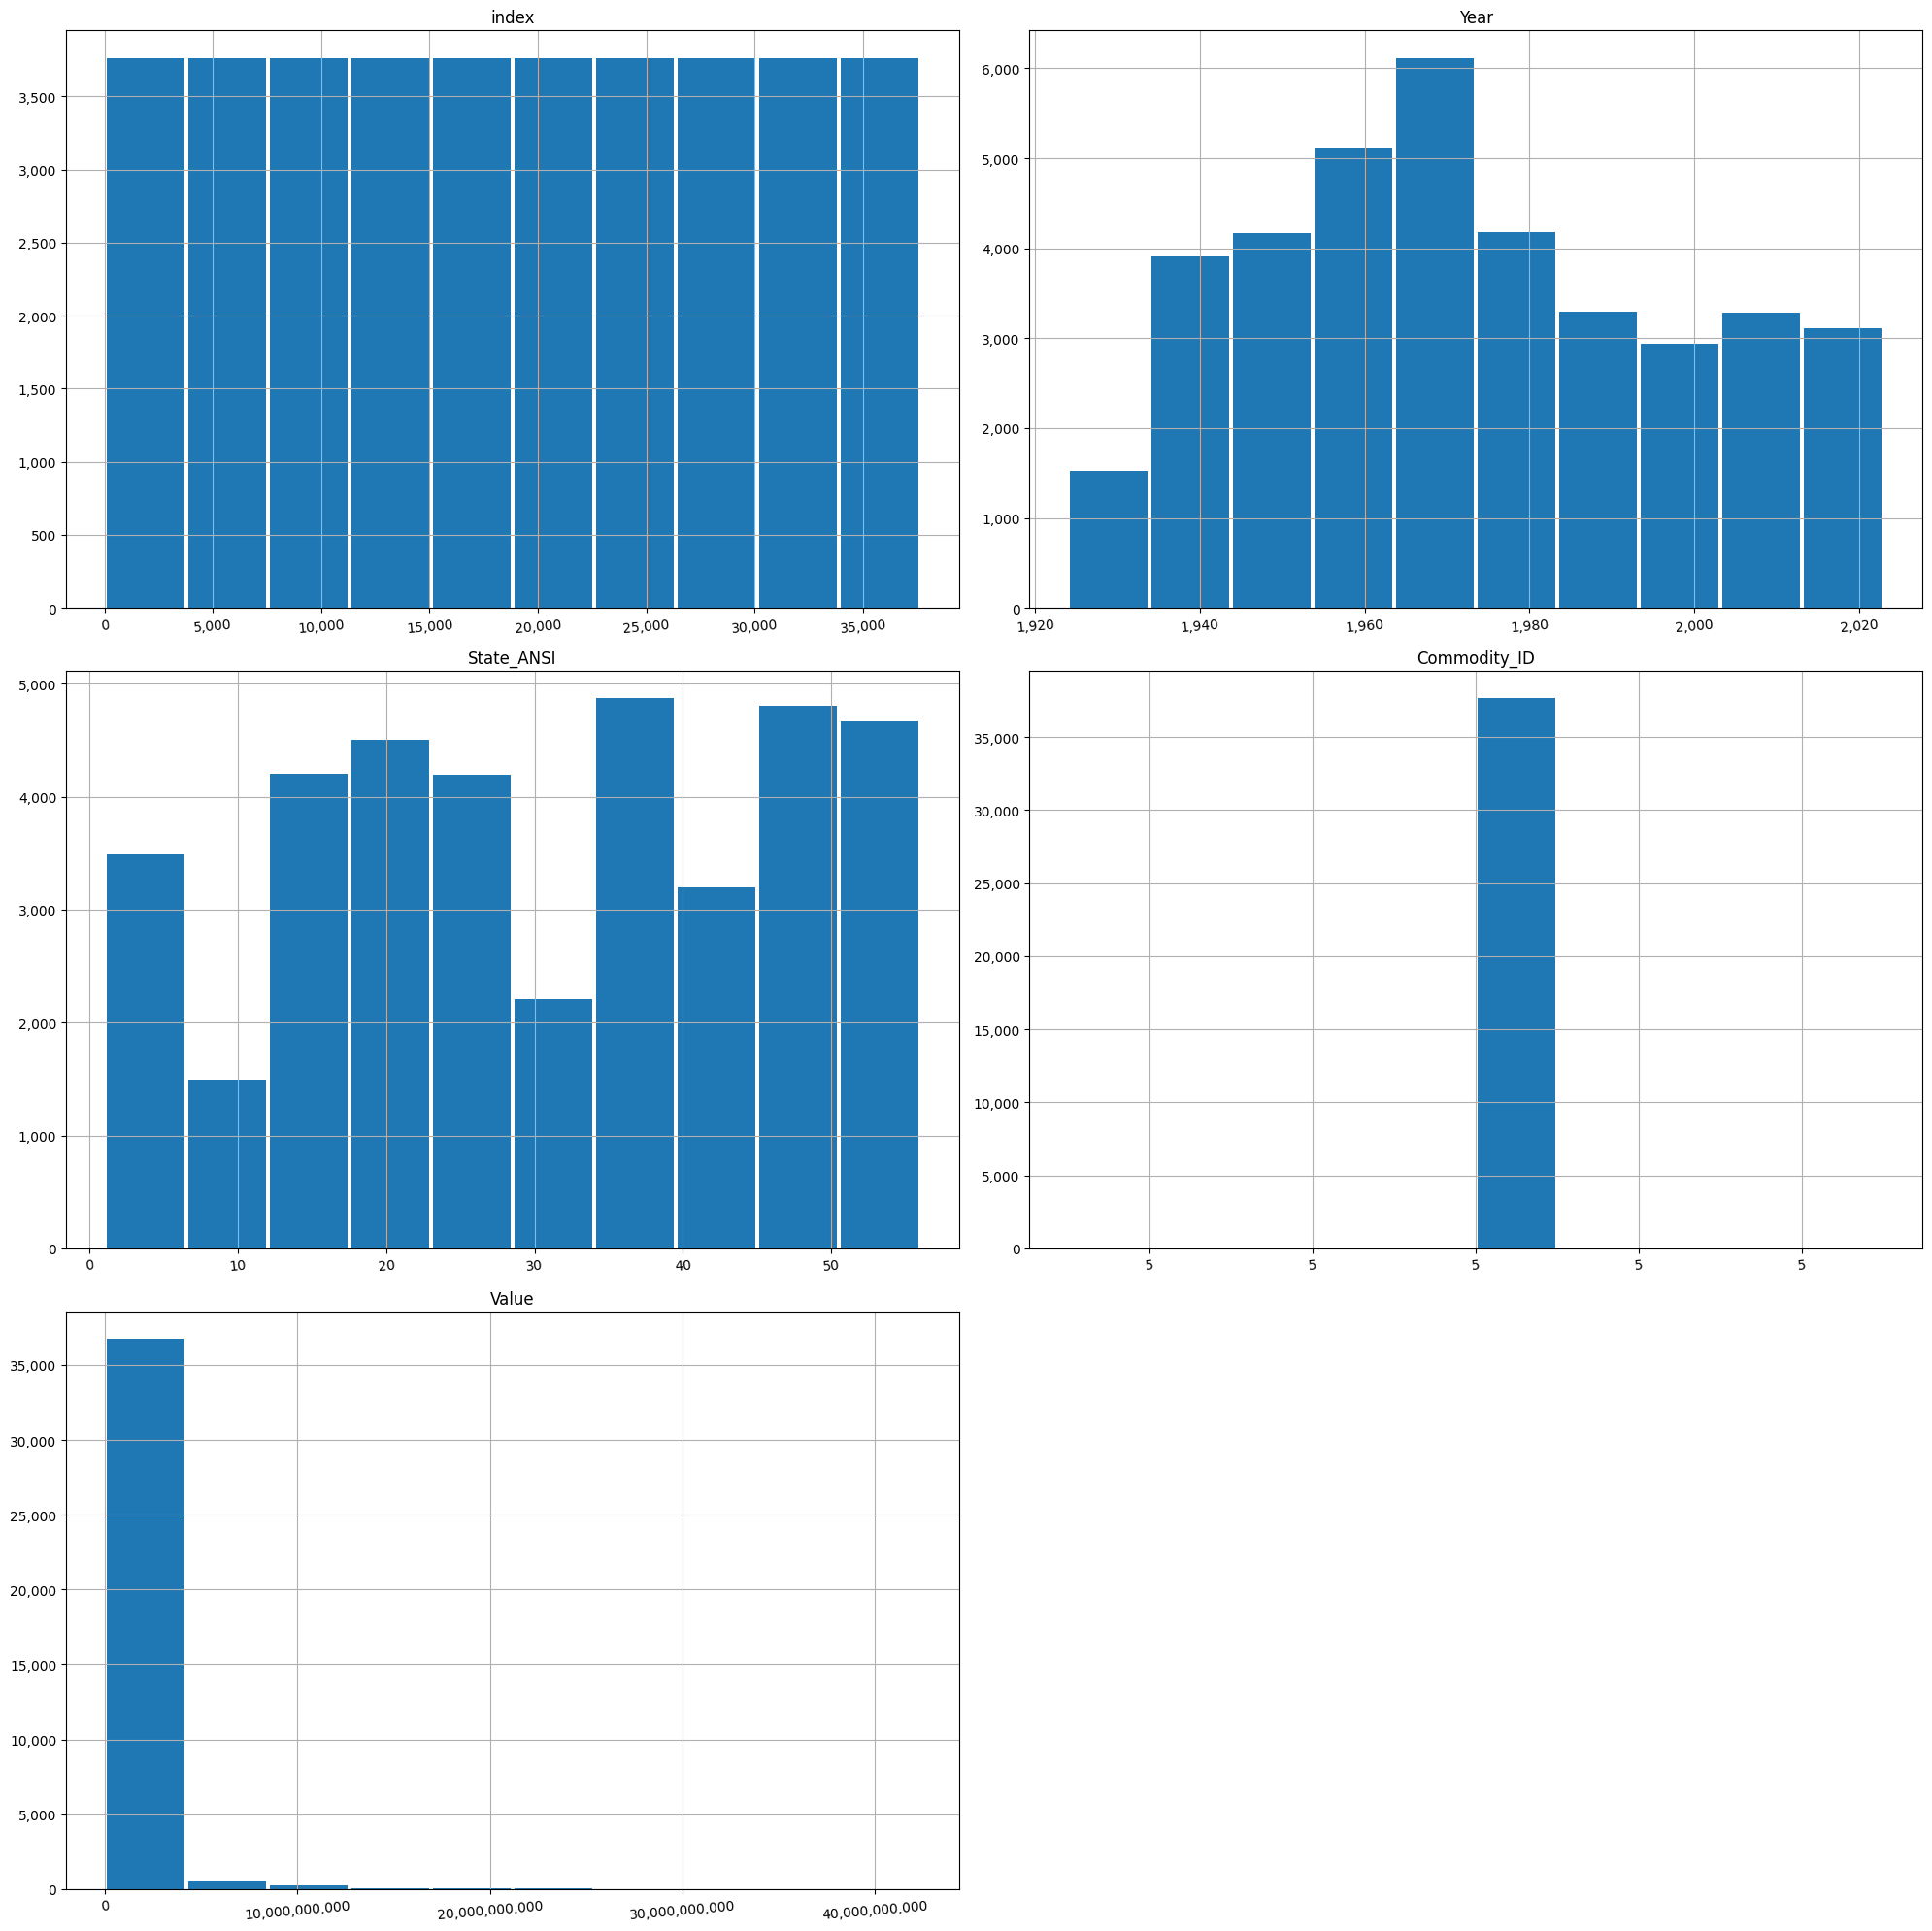

In [109]:
histog = milk_production.hist(figsize=(20, 20), rwidth=0.95)

# Apply formatting to all axes
for a in histog.flatten():
    a.tick_params(axis='x', rotation=5)
    a.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
    a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

### 10. Sort Data by Value to Verify Distribution.

In [110]:
milk_production[['Value', 'State_ANSI', 'Year']].sort_values(by='Value', ascending=False)

,Value,State_ANSI,Year
3065,42339000000,6,2014
748,41861000000,6,2021
3729,41801000000,6,2012
411,41787000000,6,2022
4055,41462000000,6,2011
...,...,...,...
19169,1330000,2,1969
18819,1300000,2,1970
17819,1280000,2,1971
18219,1260000,2,1971


<Axes: >

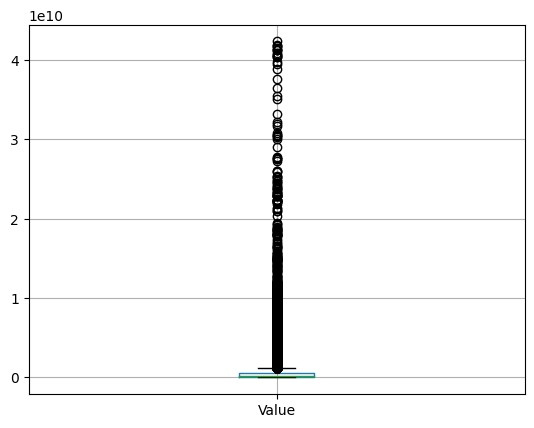

In [111]:
milk_production.boxplot('Value')

### 11. Use PRAGMA to Check Column Data Type in SQLite query 

In [112]:
%%sql

PRAGMA table_info(milk_production);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Year,INTEGER,0,None,0
2,Period,TEXT,0,None,0
3,Geo_Level,TEXT,0,None,0
4,State_ANSI,REAL,0,None,0
5,Commodity_ID,INTEGER,0,None,0
6,Domain,TEXT,0,None,0
7,Value,INTEGER,0,None,0


### 12. Confirm Null Values in the Value Column

In [113]:
%%sql

Select 
    Year, State_ANSI, Value
From milk_production
Where Value is null

 * sqlite:///farm.db
Done.


Year,State_ANSI,Value


## State Lookup

### 1. Read the state_lookup CSV file and write it to the SQL database

In [114]:
state_lookup=pd.read_csv('state_lookup.csv')

In [115]:
state_lookup.to_sql('state_lookup',
                         cnn,
                        if_exists= 'replace')

50

### 2. Verify SQL magic is Functioning and Load Data as a DataFrame

In [116]:
%%sql 

Select * 

From state_lookup
limit 5

 * sqlite:///farm.db
Done.


index,State,State_ANSI
0,ALABAMA,1
1,ALASKA,2
2,ARIZONA,4
3,ARKANSAS,5
4,CALIFORNIA,6


### 3. Check for Unique Values in each column, and Identify Duplicate Rows

In [117]:
state_lookup.nunique()

State         50
State_ANSI    50
dtype: int64

### 4. Use PRAGMA to Check Column Data Type in SQLite query 

In [118]:
%%sql

PRAGMA table_info(state_lookup);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,State,TEXT,0,None,0
2,State_ANSI,INTEGER,0,None,0


## Yogurt Production

### 1. Read the cheese_production CSV file and write it to the SQL database

In [119]:
yogurt_production=pd.read_csv('yogurt_production.csv')

In [120]:
yogurt_production.to_sql('yogurt_production',
                         cnn,
                        if_exists= 'replace')

149

### 2. Verify SQL magic is Functioning and Load Data as a DataFrame

In [121]:
%%sql 

Select * 

From yogurt_production
limit 5

 * sqlite:///farm.db
Done.


index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,2022,YEAR,STATE,6,4,TOTAL,"377,839,000"
1,2022,YEAR,STATE,36,4,TOTAL,"793,256,000"
2,2021,YEAR,STATE,6,4,TOTAL,"374,637,000"
3,2021,YEAR,STATE,36,4,TOTAL,"774,881,000"
4,2020,YEAR,STATE,6,4,TOTAL,"354,906,000"


In [122]:
result5 = %sql Select * From yogurt_production
yogurt_production = result5.DataFrame()

 * sqlite:///farm.db
Done.


In [123]:
yogurt_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,0,2022,YEAR,STATE,6,4,TOTAL,"377,839,000"
1,1,2022,YEAR,STATE,36,4,TOTAL,"793,256,000"
2,2,2021,YEAR,STATE,6,4,TOTAL,"374,637,000"
3,3,2021,YEAR,STATE,36,4,TOTAL,"774,881,000"
4,4,2020,YEAR,STATE,6,4,TOTAL,"354,906,000"


### 3. Check Data Type and Number of Non-Null rows. 

In [124]:
yogurt_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         149 non-null    int64 
 1   Year          149 non-null    int64 
 2   Period        149 non-null    object
 3   Geo_Level     149 non-null    object
 4   State_ANSI    149 non-null    int64 
 5   Commodity_ID  149 non-null    int64 
 6   Domain        149 non-null    object
 7   Value         149 non-null    object
dtypes: int64(4), object(4)
memory usage: 9.4+ KB


### 4. Check for Unique Values in each column, and Identify Duplicate Rows

In [125]:
yogurt_production.nunique()

index           149
Year             29
Period            1
Geo_Level         1
State_ANSI       15
Commodity_ID      1
Domain            1
Value           146
dtype: int64

In [126]:
yogurt_production[yogurt_production.duplicated()]

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value


### 5. Confirm Null Counts

In [127]:
yogurt_production.isna().sum()

index           0
Year            0
Period          0
Geo_Level       0
State_ANSI      0
Commodity_ID    0
Domain          0
Value           0
dtype: int64

### 6. Generate a Statistical Summary of the Data.

In [128]:
yogurt_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,149,74,43,0,37,74,111,148
Year,149,"2,002",9,"1,990","1,994","2,002","2,008","2,022"
State_ANSI,149,31,17,6,17,36,47,55
Commodity_ID,149,4,0,4,4,4,4,4


### 7. Convert the Value Column to Numeric, Remove commas, and Handle Errors.

In [129]:
yogurt_production['Value']= pd.to_numeric(yogurt_production['Value'].str.replace(',',''), errors = 'coerce')

In [130]:
yogurt_production.head()

,index,Year,Period,Geo_Level,State_ANSI,Commodity_ID,Domain,Value
0,0,2022,YEAR,STATE,6,4,TOTAL,"377,839,000"
1,1,2022,YEAR,STATE,36,4,TOTAL,"793,256,000"
2,2,2021,YEAR,STATE,6,4,TOTAL,"374,637,000"
3,3,2021,YEAR,STATE,36,4,TOTAL,"774,881,000"
4,4,2020,YEAR,STATE,6,4,TOTAL,"354,906,000"


In [131]:
yogurt_production.describe().T

,count,mean,std,min,25%,50%,75%,max
index,149,74,43,0,37,74,111,148
Year,149,"2,002",9,"1,990","1,994","2,002","2,008","2,022"
State_ANSI,149,31,17,6,17,36,47,55
Commodity_ID,149,4,0,4,4,4,4,4
Value,147,"177,199,088","200,116,623","23,000","17,002,500","105,402,000","247,226,500","793,256,000"


In [132]:
yogurt_production.to_sql('yogurt_production', cnn, index=False, if_exists='replace')

149

### 8. Use the SQL Queries to Verify Max and Average Values.

In [133]:
%%sql

Select AVG(Value)
From yogurt_production

 * sqlite:///farm.db
Done.


AVG(Value)
177199088.43537414


In [134]:
%%sql

Select Max(Value)
From yogurt_production

 * sqlite:///farm.db
Done.


Max(Value)
793256000.0


### 9. Create a Histogram and Box Plot to Identify Outliers. 

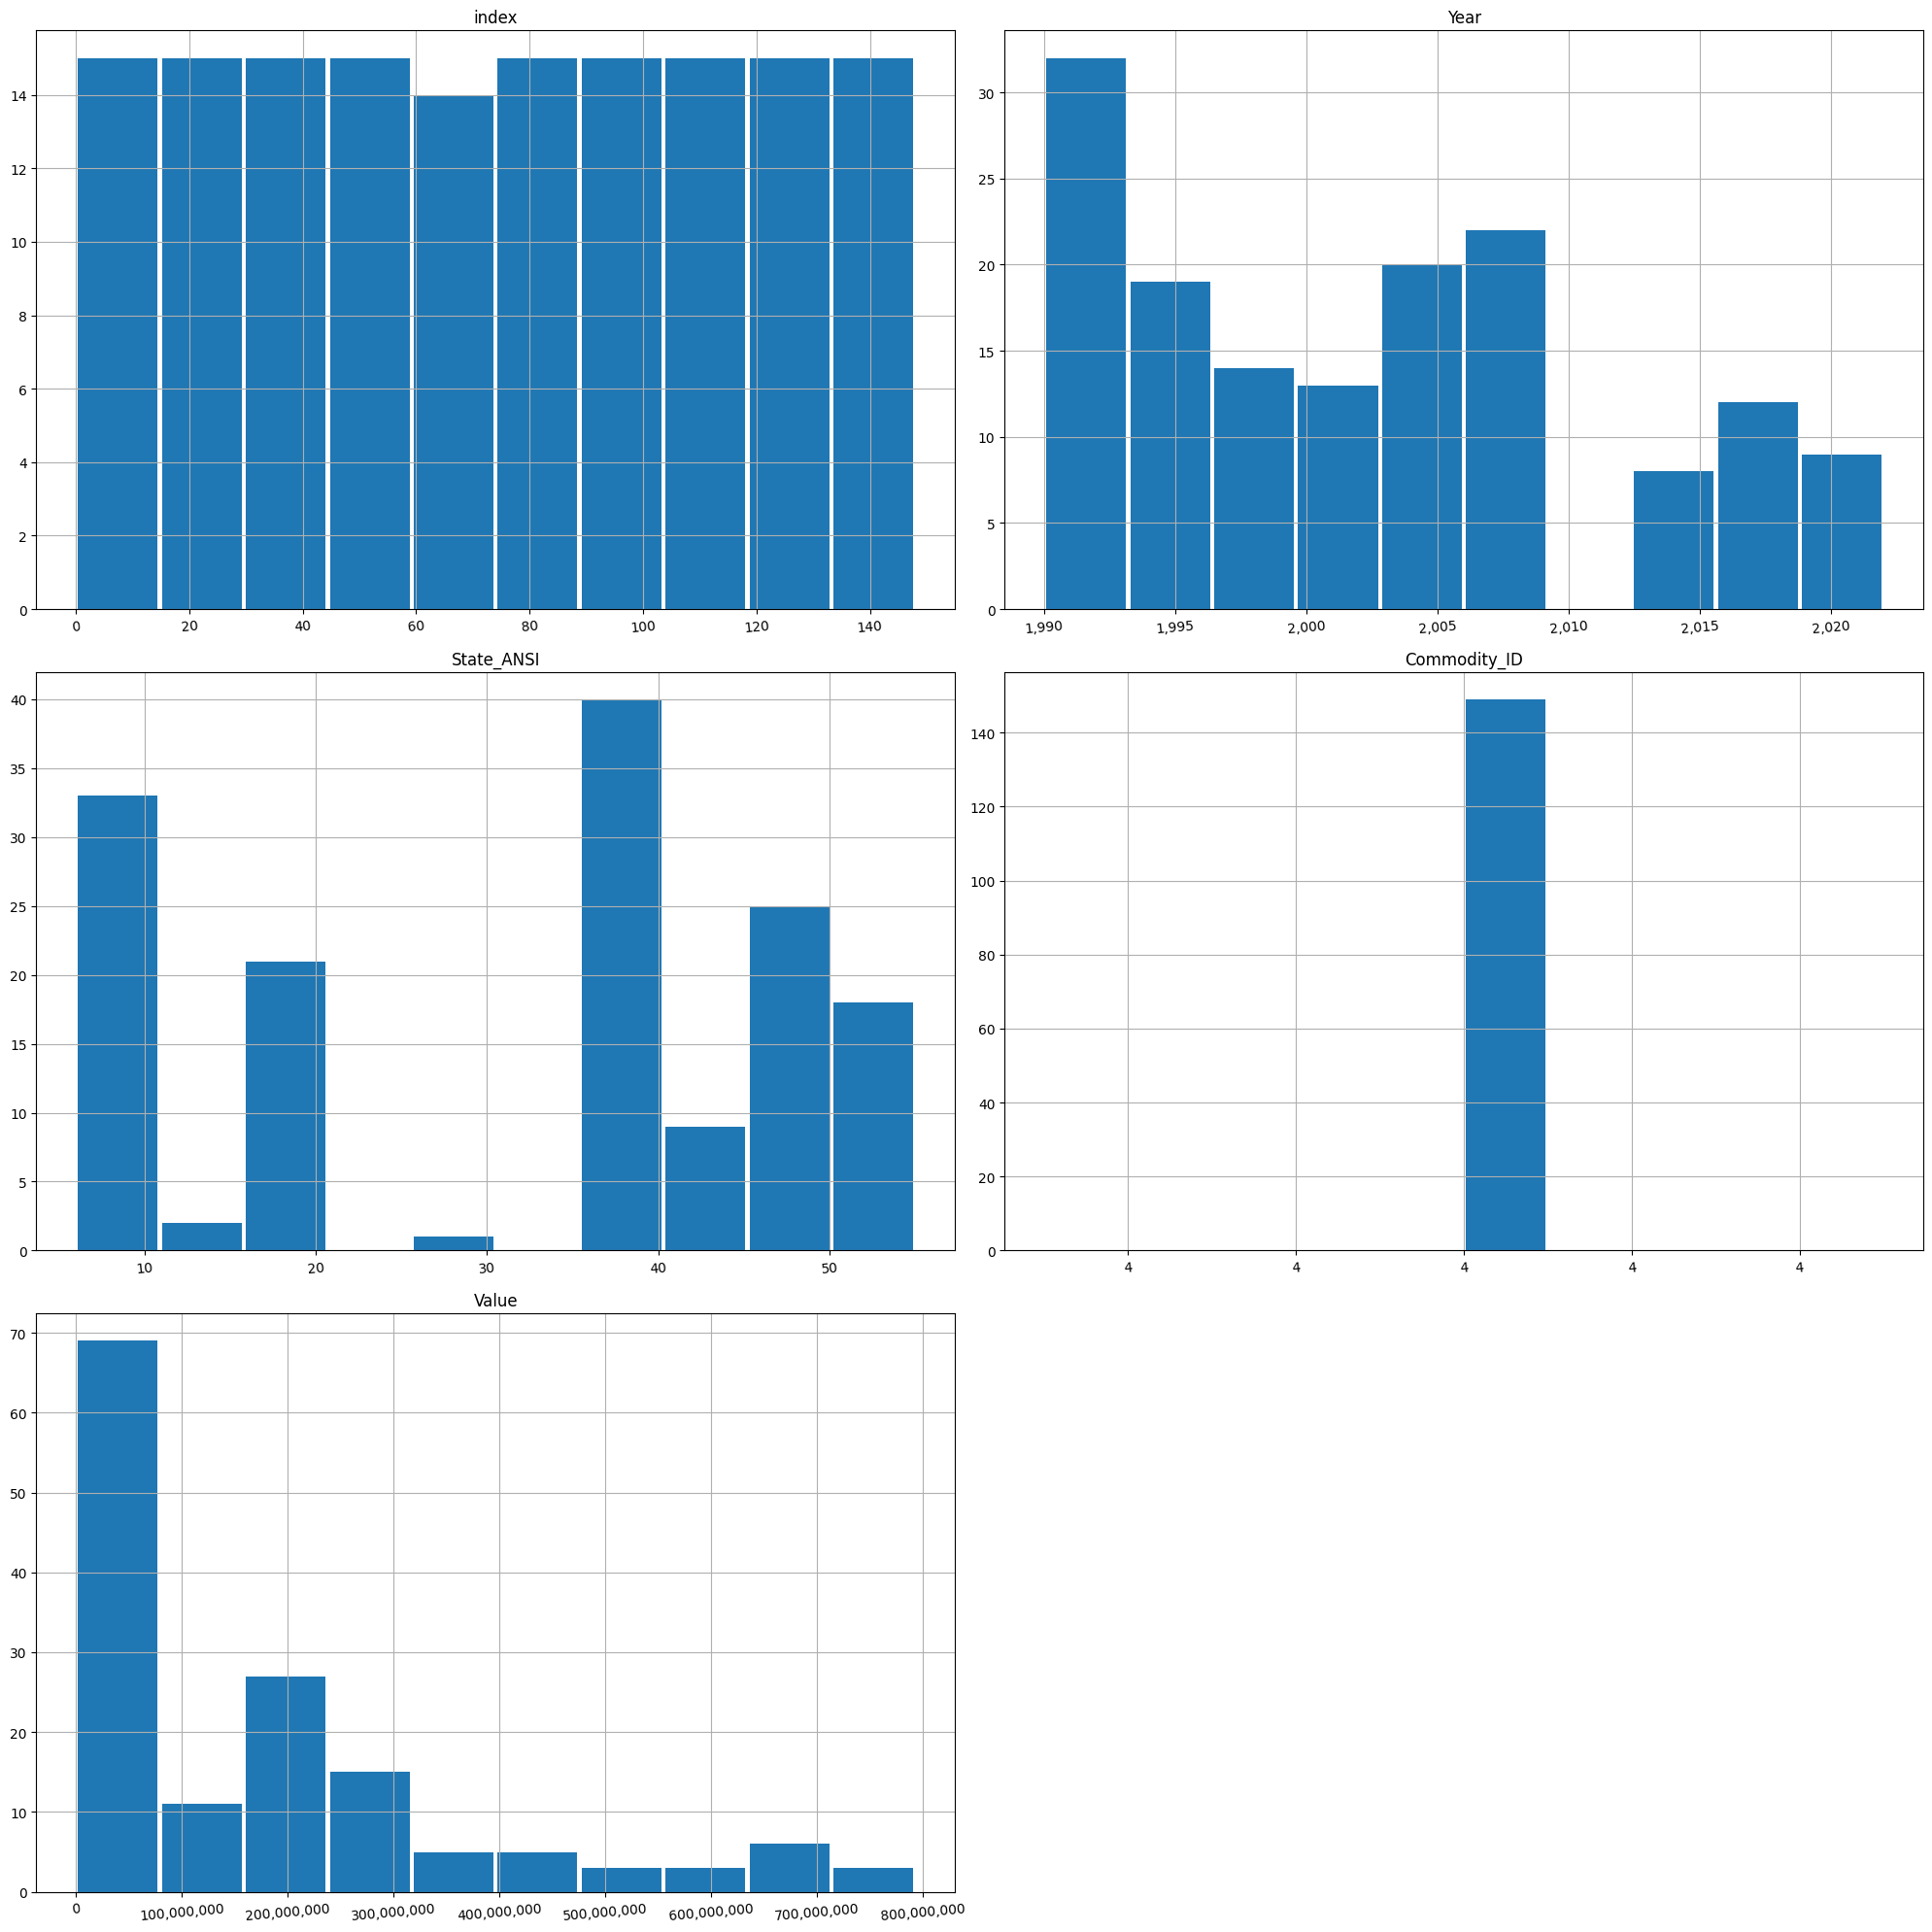

In [135]:
histogr = yogurt_production.hist(figsize=(20, 20), rwidth=0.95)

# Apply formatting to all axes
for a in histogr.flatten():
    a.tick_params(axis='x', rotation=5)
    a.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
    a.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

### 10. Sort Data by Value to Verify Distribution.

In [136]:
yogurt_production[['Value', 'State_ANSI', 'Year']].sort_values(by='Value', ascending=False)

,Value,State_ANSI,Year
1,"793,256,000",36,2022
3,"774,881,000",36,2021
5,"722,922,000",36,2020
14,"706,923,000",36,2017
10,"691,044,000",36,2018
...,...,...,...
107,"26,000",38,1995
122,"25,000",38,1993
91,"23,000",38,1998
25,NaN,6,2014


<Axes: >

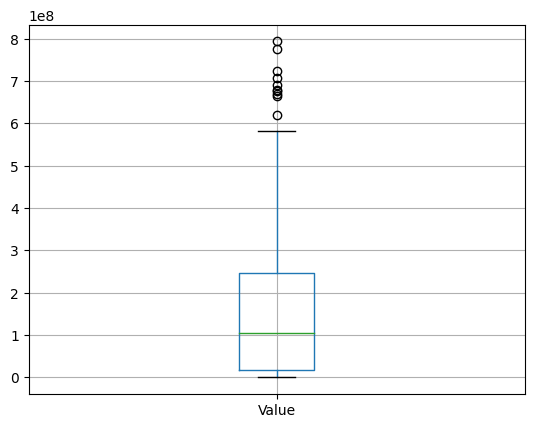

In [137]:
yogurt_production.boxplot('Value')

### 11. Use PRAGMA to Check Column Data Type in SQLite query 

In [138]:
%%sql

PRAGMA table_info(yogurt_production);

 * sqlite:///farm.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Year,INTEGER,0,None,0
2,Period,TEXT,0,None,0
3,Geo_Level,TEXT,0,None,0
4,State_ANSI,INTEGER,0,None,0
5,Commodity_ID,INTEGER,0,None,0
6,Domain,TEXT,0,None,0
7,Value,REAL,0,None,0


### 12. Confirm Null Values in the Value Column

In [139]:
%%sql

Select 
    Year, State_ANSI, Value
From yogurt_production
Where Value is null

 * sqlite:///farm.db
Done.


Year,State_ANSI,Value
2014,6,None
2014,48,None


## Scenario:

### 1. What is the State_ANSI code for Florida?

In [140]:
%%sql 

Select State, State_ANSI 
    From 
        state_lookup
    Where
        State = 'FLORIDA'

 * sqlite:///farm.db
Done.


State,State_ANSI
FLORIDA,12


### 2. What is the total cheese production for 2023?

In [141]:
%%sql

Select Year, Sum(Value2) AS Total_Cheese_Production
    From 
        cheese_production
    where 
        Year = 2023

 * sqlite:///farm.db
Done.


Year,Total_Cheese_Production
2023,4708634000


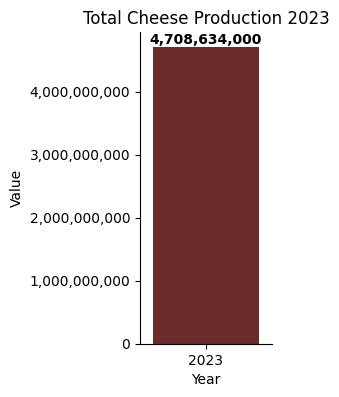

In [142]:
# Step 1: Filter to 2023
cheese_2023 = cheese_production[cheese_production["Year"] == 2023]

# Step 2: Sum the 'Value' column
total_value_2023 = cheese_2023["Value"].sum()

# Step 3: Create a new DataFrame with the total
sum_df = pd.DataFrame({"Year": [2023], "Value": [total_value_2023]})

# Step 4: Plot it
g = sns.catplot(data=sum_df, x="Year", y="Value", kind="bar", height=4, aspect=0.5, palette=["#742121"])

# Step 5: Add data label above the bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Disable scientific notation on y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add a title
plt.title("Total Cheese Production 2023")

# Show the plot
plt.show()

### 3. How much cheese did New Jersey produce in April 2023?

In [143]:
%%sql

Select cp.Period, cp.Year, sl.State, sl.State_ANSI, cp.Value2 AS cheese_production 
    From 
        cheese_production cp
      Join
        state_lookup sl on 
        sl.State_ANSI = cp.State_ANSI
    Where 
        cp.Period = 'APR' AND 
        cp.Year = 2023 AND 
        sl.State = 'NEW JERSEY' AND 
        sl.State_ANSI = 34

 * sqlite:///farm.db
Done.


Period,Year,State,State_ANSI,cheese_production
APR,2023,NEW JERSEY,34,4889000


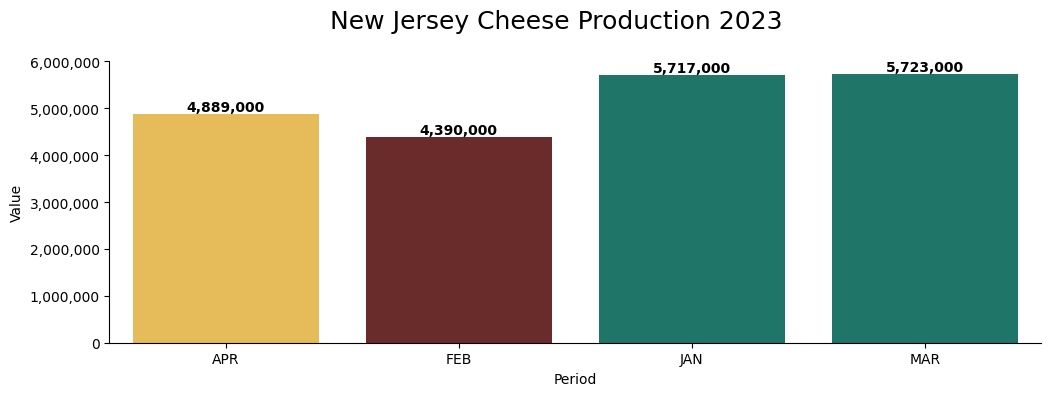

In [144]:
# Step 1: Filter to State_ANSI = 34, and April 2023
njcheese = cheese_production[(cheese_production["State_ANSI"] == 34) & (cheese_production["Year"] == 2023)]

# Step 4: Plot it
l = sns.catplot(data=njcheese, x="Period", y="Value", kind="bar", height=4, aspect=2.5, 
                palette=["#fdc543", "#742121", "#108372", "#108372"])

# Step 5: Add data labels and format y-axis
for ax in l.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Disable scientific notation and add commas to y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add a title
plt.subplots_adjust(top=0.85)
l.fig.suptitle("New Jersey Cheese Production 2023", fontsize=18)

# Show the plot
plt.show()

### 4. How many states have cheese production greater than 100 million in April 2023?

In [145]:
%%sql

Select cp.Period, cp.Year, sl.State, cp.State_ANSI, cp.Value2 AS Total_Cheese_Production
    From 
        cheese_production cp
    Left Join 
        state_lookup sl on
            sl.State_ANSI = cp.State_ANSI
        Where 
            cp.Value2 > 100000000 AND 
            cp.Period = 'APR' AND
            Year = 2023

 * sqlite:///farm.db
Done.


Period,Year,State,State_ANSI,Total_Cheese_Production
APR,2023,CALIFORNIA,6.0,208807000
APR,2023,None,None,215206000
APR,2023,WISCONSIN,55.0,289699000


In [146]:
%%sql

Select cp.Period, cp.Year, sl.State, cp.State_ANSI, cp.Value2 AS Total_Cheese_Production
    From 
        cheese_production cp
    Inner Join 
        state_lookup sl on
            sl.State_ANSI = cp.State_ANSI
        Where 
            cp.Value2 > 100000000 AND 
            cp.Period = 'APR' AND
            Year = 2023

 * sqlite:///farm.db
Done.


Period,Year,State,State_ANSI,Total_Cheese_Production
APR,2023,CALIFORNIA,6.0,208807000
APR,2023,WISCONSIN,55.0,289699000


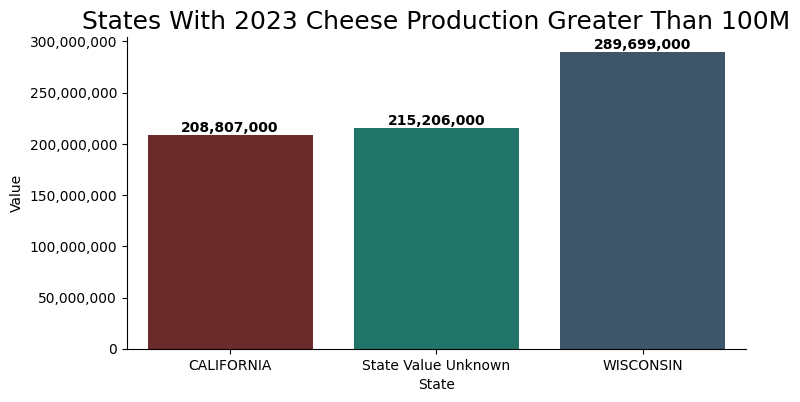

In [147]:
# Step 1: Filter to Value = 34,  Year = 2023, and Period = APR
greatestcheese = cheese_production[(cheese_production["Value"] >= 100000000) & 
                                   (cheese_production["Year"] == 2023) & 
                                   (cheese_production["Period"] == 'APR')]

#Plot here
greatestcheese = pd.merge(greatestcheese, state_lookup, left_on='State_ANSI', right_on='State_ANSI', how='left')
greatestcheese.loc[greatestcheese["State"].isna(), "State"] = "State Value Unknown"

# Step 4: Plot it
m = sns.catplot(data=greatestcheese, x="State", y="Value", kind="bar", height=4, aspect=1.75, 
                palette=["#742121","#108372","#38556F"])

# Step 5: Add data label above the bar
for ax in m.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}', 
                    (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Disable scientific notation on y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add a title
plt.title("States With 2023 Cheese Production Greater Than 100M", fontsize=18)

# Show the plot
plt.show()

### 5. How much cheese did ALL states provide in 2023 by month?

In [148]:
%%sql

Select  Year, Period, Sum(Value2) AS Total_Cheese_Production
    From 
        cheese_production
    Where 
        Year = 2023
    Group By 
        Period
    Order By
        Sum(Value2) DESC

 * sqlite:///farm.db
Done.


Year,Period,Total_Cheese_Production
2023,MAR,1231918000
2023,JAN,1205337000
2023,APR,1171117000
2023,FEB,1100262000


<Figure size 220x500 with 0 Axes>

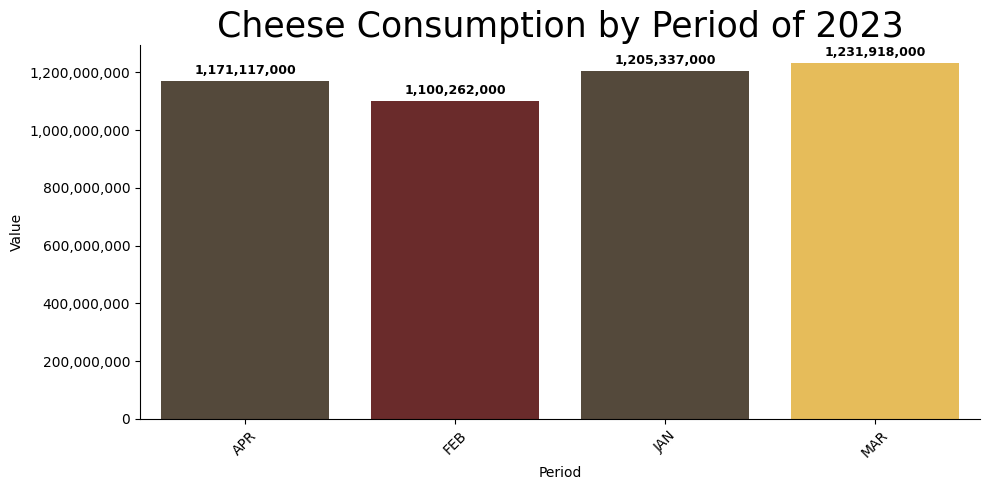

In [149]:
# Step 1: Filter to 2023

allcheese = cheese_production[cheese_production["Year"] == 2023]

# Group the data
allbcheese = allcheese.groupby(['Period','Year'])[['Value']].agg({'Value': 'sum'}).reset_index()

# Create the catplot
plt.figure(figsize=(2.2,5))
g = sns.catplot(data=allbcheese, x='Period', y='Value',  kind='bar', height=5, aspect=2, 
                palette=["#584937", "#742121", 
                         "#584937", "#fdc543"])

plt.xticks(rotation=45)
plt.title("Cheese Consumption by Period of 2023", fontsize=25)

# Add values on top of the bars
for bar in g.ax.patches:
    height = bar.get_height()
    g.ax.annotate(f'{height:,.0f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=9, fontweight='bold')

# Format y-axis labels
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

 
plt.tight_layout()
plt.show()

### 6. Find the total cheese production for each month in 2022.

In [150]:
%%sql 

    Select Year, Period, Sum(Value2) AS Total_Cheese_Production
    From 
        cheese_production
    Where 
        Year = 2022
    Group By 
        Period
    Order By 
        Sum(Value2) Desc

 * sqlite:///farm.db
Done.


Year,Period,Total_Cheese_Production
2022,YEAR,14062775000
2022,MAR,1231174000
2022,MAY,1204698000
2022,DEC,1198739000
2022,JAN,1198398000
2022,OCT,1184538000
2022,APR,1173437000
2022,JUL,1170138000
2022,JUN,1165799000
2022,AUG,1157264000


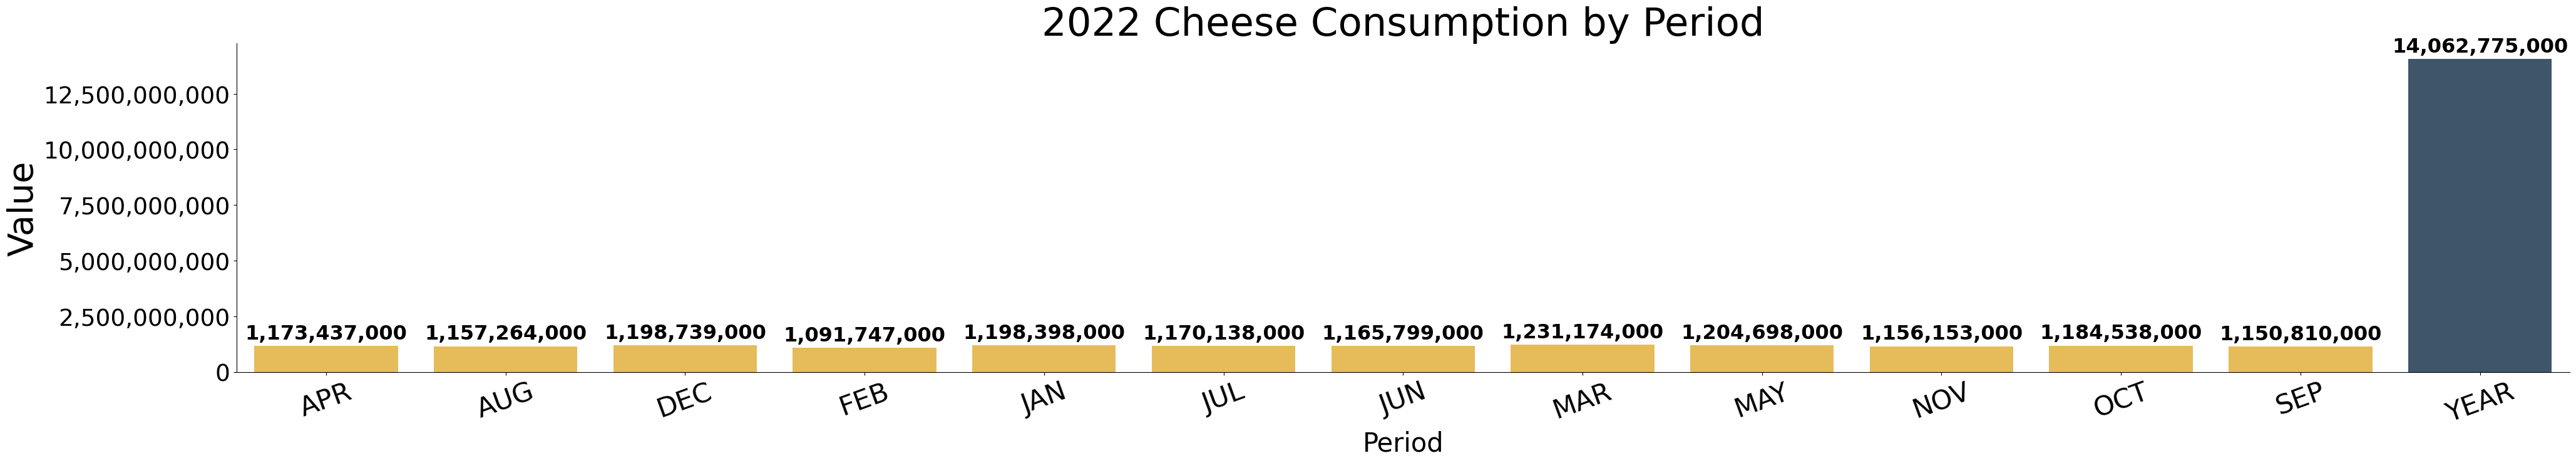

In [151]:
# Step 1: Filter to 2022 
cheese_202 = cheese_production[cheese_production["Year"] == 2022]

# Group the data
cheese_2022 = cheese_202.groupby(['Period', 'Year'])[['Value']].agg({'Value': 'sum'}).reset_index()

# Create the catplot and capture the object
g = sns.catplot(data=cheese_2022, x='Period', y='Value', kind='bar', height=7.5, aspect=5.5, 
                palette=["#fdc543", "#fdc543", "#fdc543", "#fdc543", "#fdc543", "#fdc543", "#fdc543", 
                         "#fdc543", "#fdc543", "#fdc543", "#fdc543", "#fdc543", "#38556F"])

# Rotate x labels
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)

# Set title
g.ax.set_title("2022 Cheese Consumption by Period", fontsize=45)

# Set x and y axis labels with increased font size
g.ax.set_xlabel("Period", fontsize=30)
g.ax.set_ylabel("Value", fontsize=40)

# Increase font size of x and y-axis tick labels
for label in g.ax.get_yticklabels():
    label.set_fontsize(26)
g.ax.tick_params(axis='x', labelrotation=20, labelsize=31)
g.ax.tick_params(axis='y', labelsize=27)

# Format y-axis
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add values on top of bars
for bar in g.ax.patches:
    height = bar.get_height()
    g.ax.annotate(f'{height:,.0f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=23, fontweight='bold')


# Tidy layout and show plot
plt.tight_layout()
plt.show()

In [152]:
%%sql
    Select Year, Sum(Value2) AS Total_Cheese_Production 
    From cheese_production
    Where Year = 2022

 * sqlite:///farm.db
Done.


Year,Total_Cheese_Production
2022,28145670000


In [153]:
# Please note that there is an additional bar for 2022 labeled Year, but is not the total for the Year of 2022. 
# This could attribute to the missing data for the months in 2023, or missing data from 2022. 

### 7. What is the total yogurt production for states in the year 2022 which also have cheese production data from 2023?

In [154]:
%%sql


SELECT yp.Year, yp.State_ANSI, (yp.Value) AS Yogurt_Production
FROM 
    yogurt_production yp
WHERE 
    yp.Year = 2022 and 
            yp.State_ANSI in 
                (SELECT DISTINCT cp.State_ANSI 
                 FROM cheese_production cp
                 WHERE cp.Year = 2023) 
    

 * sqlite:///farm.db
Done.


Year,State_ANSI,Yogurt_Production
2022,6,377839000.0
2022,36,793256000.0


In [155]:
%%sql


SELECT yp.Year, Sum(yp.Value) AS Total_Yogurt_Production 
FROM 
    yogurt_production yp
WHERE 
    yp.Year = 2022 and 
            yp.State_ANSI in 
                (SELECT DISTINCT cp.State_ANSI 
                 FROM cheese_production cp
                 WHERE cp.Year = 2023) 

 * sqlite:///farm.db
Done.


Year,Total_Yogurt_Production
2022,1171095000.0


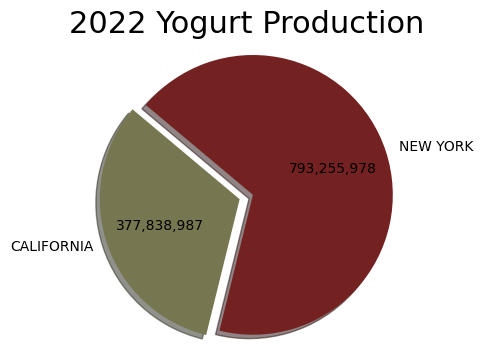

In [156]:
# Filter 2023 cheese production and get unique State_ANSI values
cheese_states_2023 = cheese_production[cheese_production['Year'] == 2023]['State_ANSI'].unique()

# Filter 2022 yogurt production for only those states found in 2023 cheese production
yogurt_2022_filtered = yogurt_production[
    (yogurt_production['Year'] == 2022) &
    (yogurt_production['State_ANSI'].isin(cheese_states_2023))
]

# Merge with state lookup
yogurt_2022_merged = pd.merge(yogurt_2022_filtered, state_lookup, on='State_ANSI', how='left')

# Define a function to show absolute values in pie chart
def absolute_value(val):
    total = yogurt_2022_merged['Value'].sum()
    absolute = int(round(val / 100 * total))
    return f'{absolute:,}'

# Plot pie chart
plt.figure(figsize=(5.2,4))
plt.pie(
    yogurt_2022_merged['Value'], 
    labels=yogurt_2022_merged['State'], 
    autopct=absolute_value, 
    explode=[0.1] + [0]*(len(yogurt_2022_merged)-1),  # explode only first slice
    shadow=True, 
    startangle=140,
colors=(["#767750", #Maroon
        "#742121"])
)
plt.title('2022 Yogurt Production', fontsize=22)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 8. What States produced milk in 2023?

In [157]:
%%sql


Select mp.Year, sl.State, mp.State_ANSI, Sum(Value) AS Milk_Production_By_State
    From 
        milk_production mp
    Inner Join 
        state_lookup sl on
            mp.State_ANSI = sl.State_ANSI 
    Where mp.Year = 2023
    Group By
        mp.State_ANSI 
    Order By 
        mp.Value DESC

 * sqlite:///farm.db
Done.


Year,State,State_ANSI,Milk_Production_By_State
2023,CALIFORNIA,6.0,17637000000
2023,WISCONSIN,55.0,13332000000
2023,TEXAS,48.0,7139000000
2023,IDAHO,16.0,7035000000
2023,NEW YORK,36.0,6675000000
2023,MICHIGAN,26.0,5020000000
2023,MINNESOTA,27.0,4419000000
2023,PENNSYLVANIA,42.0,4233000000
2023,NEW MEXICO,35.0,2989000000
2023,WASHINGTON,53.0,2612000000


<Figure size 220x1050 with 0 Axes>

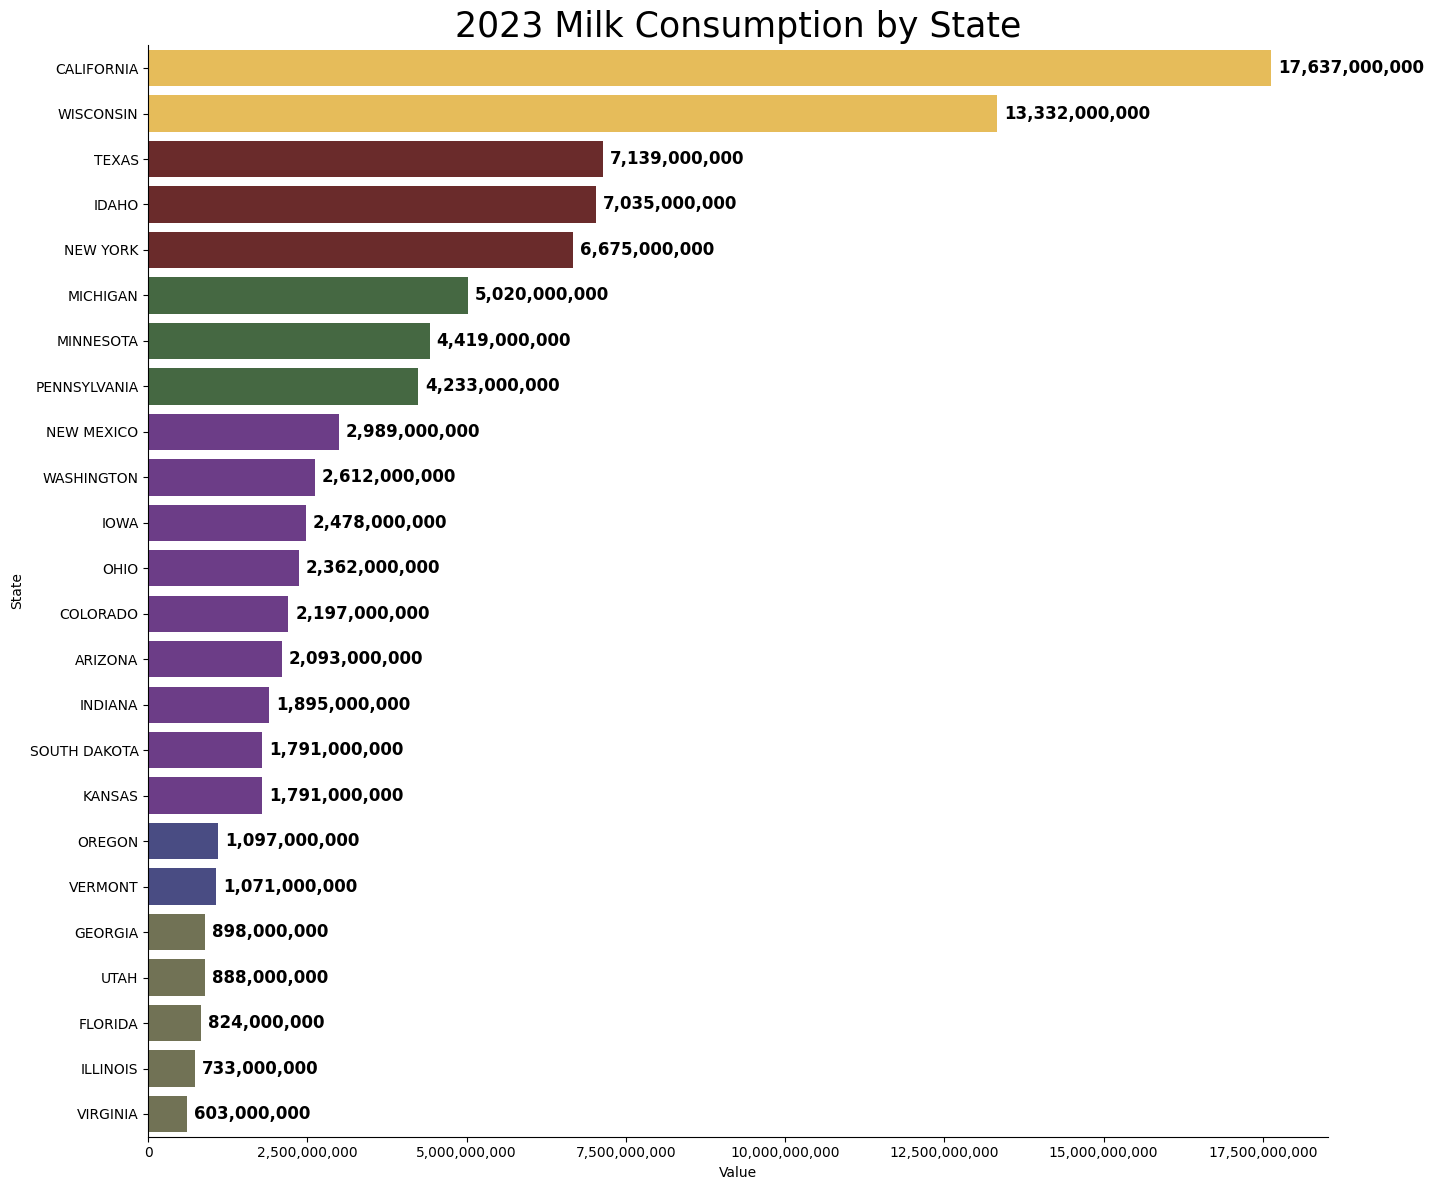

In [158]:
# Filter and prepare data
milk_202 = milk_production[milk_production['Year'] == 2023]
milk_202 = pd.merge(milk_202, state_lookup, on='State_ANSI', how='left')
milk_2023 = milk_202.groupby(['State', 'Year'])['Value'].sum(min_count=1).reset_index()

# Sort states by milk consumption in descending order
milk_2023 = milk_2023.sort_values('Value', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(2.2,10.5))
g = sns.catplot(
    data=milk_2023,
    y='State',  # now on y-axis
    x='Value',  # now on x-axis
    kind='bar', orient='h',
    height=12,  # adjust for better spacing
    aspect=1.2,
    palette=["#fdc543" , #Yellow  
            "#fdc543", #Yellow 
             "#742121" , #Maroon
             "#742121", #Maroon
             "#742121", #Maroon
             "#406E3C", #Green  
             "#406E3C" , #Green  
             "#406E3C", #Green  
             "#6F3193", #purple
             "#6F3193", #purple
             "#6F3193", #purple
             "#6F3193", #purple
             "#6F3193" , #purple
             "#6F3193", #purple
             "#6F3193", #purple
             "#6F3193", #purple
             "#6F3193", #purple
             "#3F438D", #Blue
             "#3F438D" , #Blue
             "#767750", #Olive
             "#767750", #Olive
             "#767750", #Olive
             "#767750" , #Olive
             "#767750", #Olive
            ]
)

# Set title
g.ax.set_title("2023 Milk Consumption by State", fontsize=25)

# Format x-axis with commas
g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add values to the right of bars
for bar in g.ax.patches:
    width = bar.get_width()
    if not pd.isna(width):
        g.ax.annotate(f'{width:,.0f}',
                      xy=(width, bar.get_y() + bar.get_height() / 2),
                      xytext=(5, 0),
                      textcoords='offset points',
                      ha='left', va='center', fontsize=12, fontweight='bold')
        
plt.tight_layout()
plt.show()

### 9. Did Delaware produce any cheese in April 2023?

In [159]:
%%sql

    Select cp.Year, cp.Period, cp.State_ANSI, sl.State, cp.Value2 AS Total_Cheese_Production
        From
            cheese_production cp
        Left Join
            state_lookup sl on
            cp.State_ANSI = sl.State_ANSI
       Where 
            cp.Period = 'APR' AND
            cp.Year = 2023
        Order By
            sl.State Desc

 * sqlite:///farm.db
Done.


Year,Period,State_ANSI,State,Total_Cheese_Production
2023,APR,55.0,WISCONSIN,289699000
2023,APR,50.0,VERMONT,11279000
2023,APR,46.0,SOUTH DAKOTA,43253000
2023,APR,42.0,PENNSYLVANIA,39420000
2023,APR,39.0,OHIO,20510000
2023,APR,36.0,NEW YORK,66256000
2023,APR,35.0,NEW MEXICO,79038000
2023,APR,34.0,NEW JERSEY,4889000
2023,APR,27.0,MINNESOTA,69728000
2023,APR,19.0,IOWA,31512000


<Figure size 220x580 with 0 Axes>

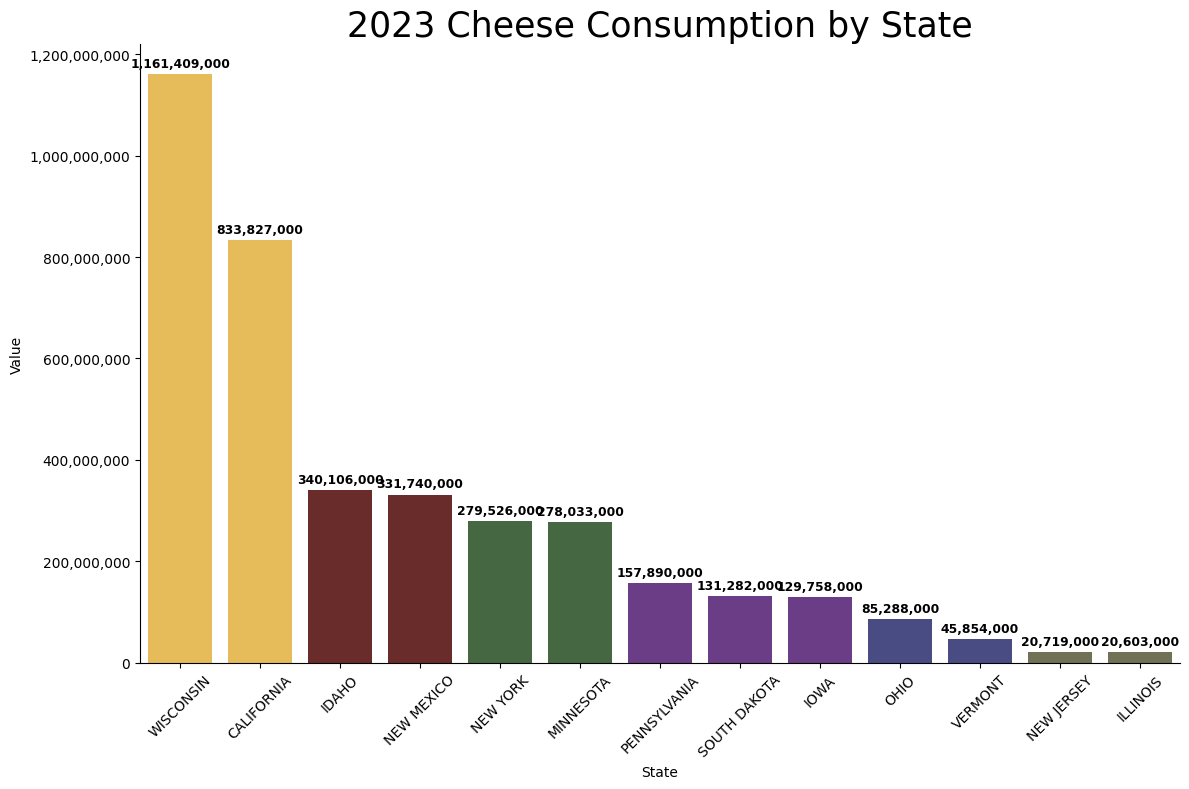

In [160]:
# Step 1: Filter to 2023
cheese_apr = cheese_production[cheese_production['Year'] == 2023]

# Merge in state names if not already done
cheese_apr = pd.merge(cheese_apr, state_lookup, on='State_ANSI', how='left')

# Group by State and Year
cheese_apr2023 = cheese_apr.groupby(['State', 'Year'], dropna=False)['Value'].sum(min_count=1).reset_index()

# Sort states by milk consumption in descending order
cheese_apr2023 = cheese_apr2023.sort_values('Value', ascending=False)

# Plot
plt.figure(figsize=(2.2,5.8))
g = sns.catplot(data=cheese_apr2023, x='State', y='Value', kind='bar', height=8, aspect=1.5, 
                palette=["#fdc543" , #Yellow 
                         "#fdc543" , #Yellow
                         "#742121", #Maroon
                         "#742121", #Maroon
                         "#406E3C" , #Green 
                         "#406E3C" , #Green 
                         "#6F3193", #purple
                         "#6F3193", #purple
                         "#6F3193", #purple
                         "#3F438D", #Blue
                         "#3F438D", #Blue
                         "#767750", #Olive
                         "#767750", #Olive
                        ])

# Rotate x-axis labels
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)

# Title and y-axis formatting
g.ax.set_title("2023 Cheese Consumption by State", fontsize=25)
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add value labels
for bar in g.ax.patches:
    height = bar.get_height()
    g.ax.annotate(f'{height:,.0f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),
                  textcoords='offset points',
                  ha='center', va='bottom', fontsize=8.95, fontweight='bold')

# Remove legend if it exists
if g._legend:
    g._legend.remove()

plt.tight_layout()
plt.show()

### 10. Your dairy division is planning on giving awards to States with the greatest influence on dairy sales for the COVID years of 2021 and 2022. In order to receive the award, States must place in the top 5 on 2 out of the 3 dairy influencers. How many States will receive an award?

### <u> Yogurt Production 2021 and 2022</u>

In [161]:
%%sql

SELECT 
    yp.Year,
    sl.State,
    yp.State_ANSI,
    yp.Value AS Total_Yogurt_Production
From 
    yogurt_production yp
Left Join 
    state_lookup sl on
    yp.State_ANSI = sl.State_ANSI
Where 
    Year in (2021, 2022)
Group By yp.Value
Order By yp.Year, yp.Value DESC

 * sqlite:///farm.db
Done.


Year,State,State_ANSI,Total_Yogurt_Production
2021,NEW YORK,36,774881000.0
2021,CALIFORNIA,6,374637000.0
2022,NEW YORK,36,793256000.0
2022,CALIFORNIA,6,377839000.0


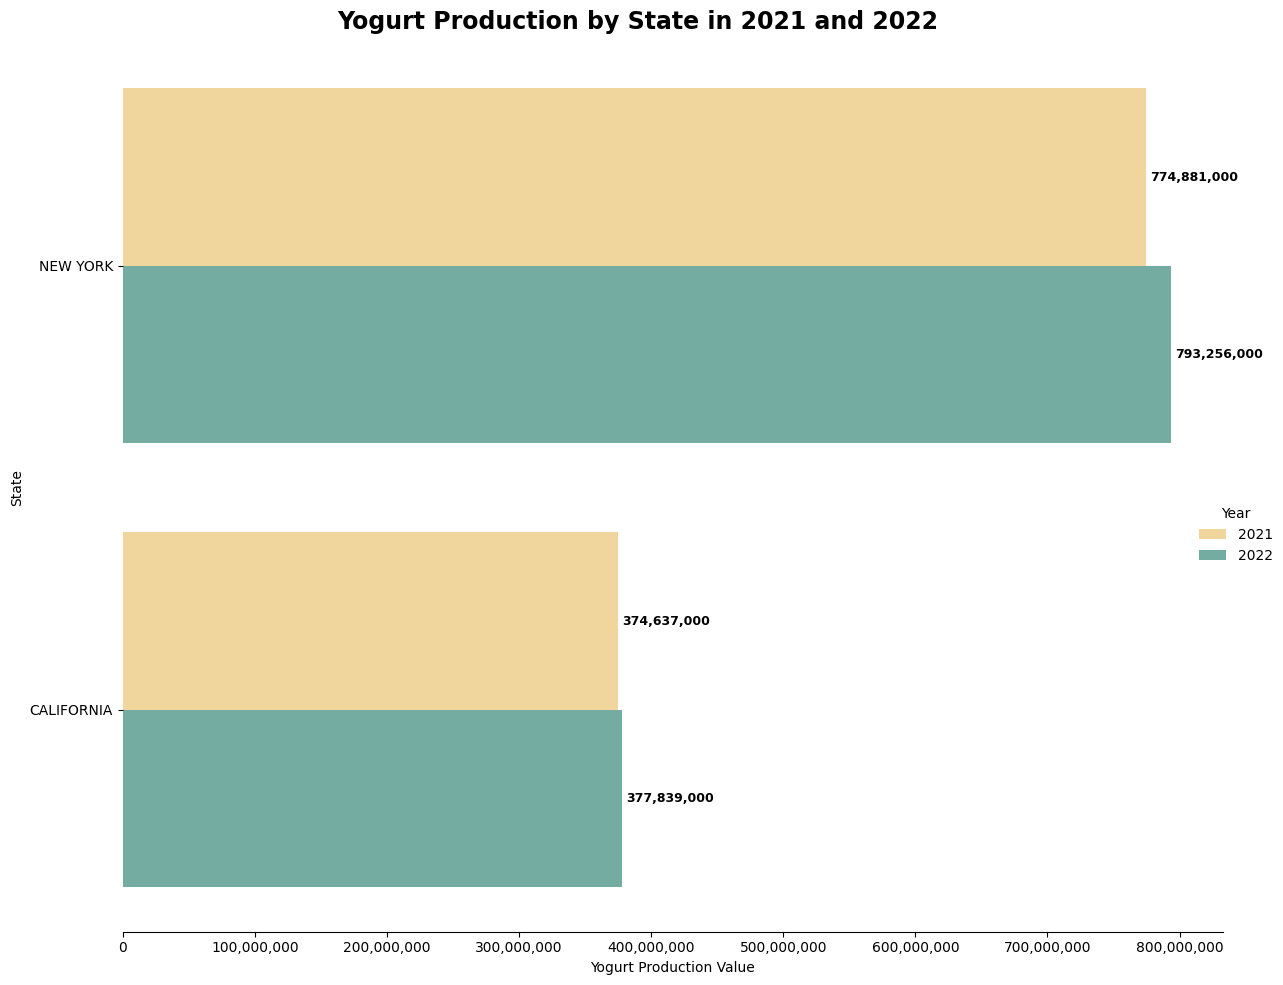

In [162]:
# Filter for 2021 and 2022 data
yog = yogurt_production[yogurt_production['Year'].isin([2021, 2022])]

# Group and rank yogurt production by state and year
yogu = (
    yog.groupby(['Year', 'State_ANSI'], dropna=False)[['Value']]
    .sum(min_count=1)
    .reset_index()
)

yogu['dense_rank'] = yogu.groupby('Year', dropna=False)['Value'] \
                         .rank(method='dense', ascending=False, na_option='keep')

# Merge with state lookup and sort
yogut = pd.merge(yogu, state_lookup, on='State_ANSI', how='left')
sorted_yogu = yogut.sort_values(by='dense_rank', ascending=True, na_position='last')

# Plotting (horizontal bar chart)
rt = sns.catplot(
    data=sorted_yogu, kind="bar", y='State', x='Value', hue="Year",
    palette=["#fdc543", "#0b856f"], alpha=.6, height=10, aspect=1.2
)
rt.despine(left=True)
rt.set_axis_labels("Yogurt Production Value", "State")
rt.legend.set_title("Year")
rt.ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
rt.fig.suptitle("Yogurt Production by State in 2021 and 2022", fontsize=17, fontweight='bold')

# Annotate bars with values
for bar in rt.ax.patches:
    width = bar.get_width()
    rt.ax.annotate(f'{width:,.0f}',
                   xy=(width, bar.get_y() + bar.get_height() / 2),
                   xytext=(3, 0),
                   textcoords="offset points",
                   ha='left', va='center', fontsize=9, fontweight='bold')

# Adjust legend position
rt._legend.set_bbox_to_anchor((1, 0.45))

plt.tight_layout()
plt.show()

### <u>Milk Production 2021 and 2022</u>

In [163]:
%%sql

Select 
        mp.Year,
        sl.State,
        sum(Value) AS Total_Milk_Production,
        row_number() OVER (Partition By Year Order By sum(Value) DESC) rank
    From
        milk_production mp
    Left Join 
        state_lookup sl on
        mp.State_ANSI = sl.State_ANSI
    where mp.Year in (2021, 2022)
    Group By 
        mp.Year,
        mp.State_ANSI
    Order By
        rank
    limit 10

 * sqlite:///farm.db
Done.


Year,State,Total_Milk_Production,rank
2021,CALIFORNIA,83722000000,1
2022,CALIFORNIA,83574000000,1
2021,WISCONSIN,63416000000,2
2022,WISCONSIN,63764000000,2
2021,IDAHO,32824000000,3
2022,IDAHO,33256000000,3
2021,TEXAS,31198000000,4
2022,TEXAS,33048000000,4
2021,NEW YORK,31080000000,5
2022,NEW YORK,31320000000,5


<Figure size 220x400 with 0 Axes>

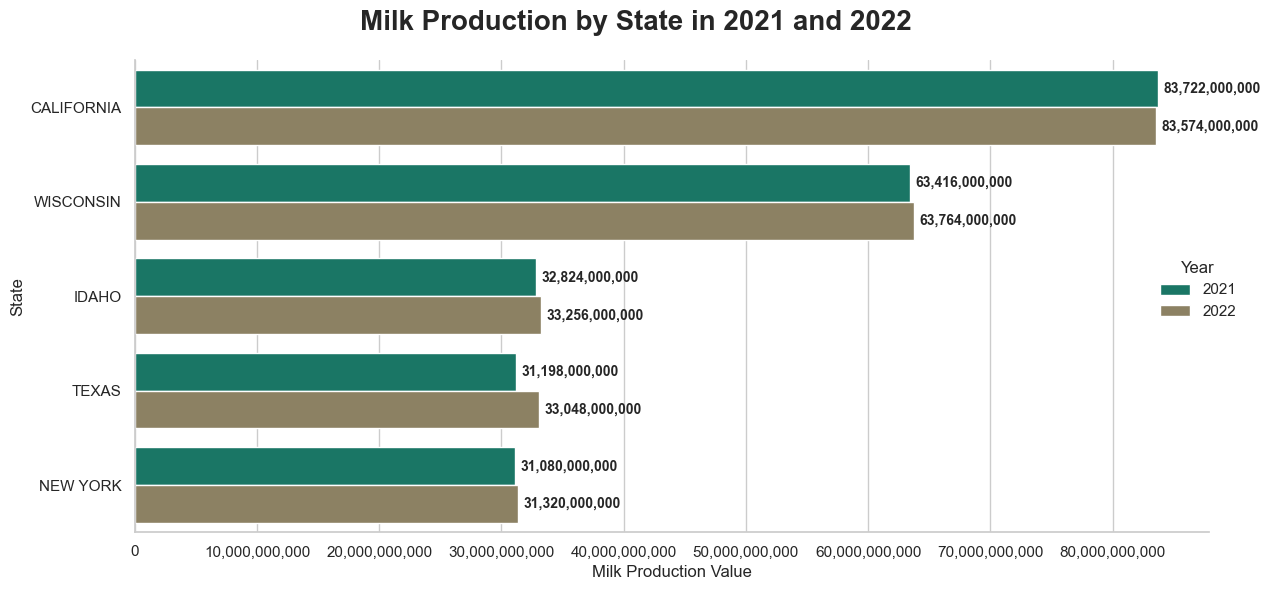

In [164]:
# Step 1–4: Filter, group, rank, and merge
mi = (
    milk_production[milk_production['Year'].isin([2021, 2022])]
    .groupby(['Year', 'State_ANSI'], dropna=False)[['Value']]
    .sum(min_count=1)
    .reset_index()
)
mi['dense_rank'] = mi.groupby('Year', dropna=False)['Value'].rank(method='dense', ascending=False, na_option='keep')
mi = pd.merge(mi, state_lookup, on='State_ANSI', how='left')

# Step 5: Filter top 5 per year and prepare for plotting
mil_df = (
    mi[mi['dense_rank'] <= 5]
    .sort_values(by=['dense_rank', 'Year'], ascending=[True, True])
)

# Plot (horizontal bars)
plt.figure(figsize=(2.2,4))
sns.set(style="whitegrid")
g = sns.catplot(
    data=mil_df, y="State", x="Value", hue="Year", kind="bar", height=6, aspect=2,
    palette=["#0b856f", "#93845c"]
)

g.set_axis_labels("Milk Production Value", "State")
g.fig.suptitle("Milk Production by State in 2021 and 2022", fontsize=20, fontweight='bold')
g._legend.set_bbox_to_anchor((0.97, 0.5))
g.ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
g.ax.set_yticklabels(g.ax.get_yticklabels(), rotation=0)

# Annotate values on bars (horizontal)
for bar in g.ax.patches:
    width = bar.get_width()
    if not pd.isna(width):
        g.ax.annotate(f'{width:,.0f}',
                      xy=(width, bar.get_y() + bar.get_height() / 2),
                      xytext=(4, 0),
                      textcoords="offset points",
                      ha='left', va='center',
                      fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### <u> Cheese Production 2021 and 2022</u>

In [165]:
%%sql

Select 
        cp.Year,
        sl.State,
        sum(Value2) AS Total_Cheese_Production,
        row_number() OVER (Partition By Year Order By sum(Value2) DESC) rank
    From
        cheese_production cp
    Left Join 
        state_lookup sl on
        cp.State_ANSI = sl.State_ANSI
    where cp.Year in (2021, 2022)
    Group By 
        cp.Year,
        cp.State_ANSI
    Order By
        rank
    limit 12

 * sqlite:///farm.db
Done.


Year,State,Total_Cheese_Production,rank
2021,WISCONSIN,6985578000,1
2022,WISCONSIN,7040166000,1
2021,None,4879244000,2
2022,None,5117906000,2
2021,CALIFORNIA,4876794000,3
2022,CALIFORNIA,4921076000,3
2021,IDAHO,2009346000,4
2022,IDAHO,1979078000,4
2021,NEW MEXICO,1915658000,5
2022,NEW MEXICO,1941476000,5


<Figure size 220x400 with 0 Axes>

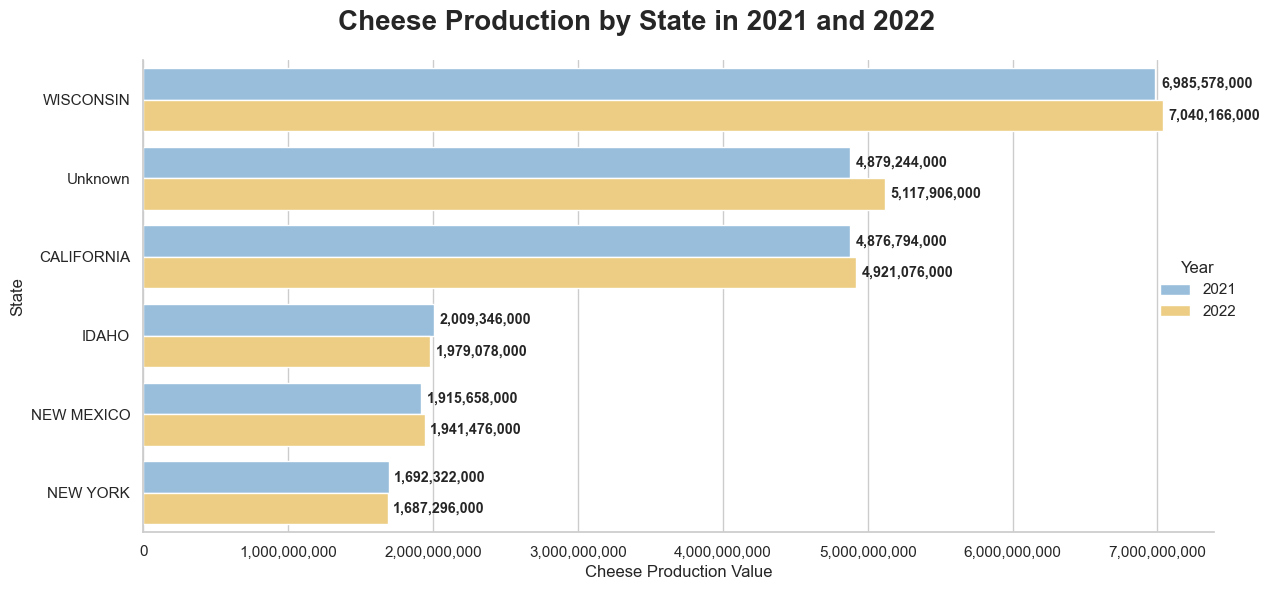

In [166]:
# Filter, group, rank, and join with lookup in one pipeline
top5_billmill = (
    cheese_production[cheese_production['Year'].isin([2021, 2022])]
    .groupby(['Year', 'State_ANSI'], dropna=False)[['Value']]
    .sum(min_count=1)
    .reset_index()
    .assign(dense_rank=lambda df: df.groupby('Year')['Value'].rank(method='dense', ascending=False, na_option='keep'))
    .sort_values(by='dense_rank', ascending=True, na_position='last')
    .merge(state_lookup, on='State_ANSI', how='left')
    .query('dense_rank <= 6')
    .sort_values(by=['Year', 'dense_rank'])
)

top5_billmill['State'] = top5_billmill['State'].fillna("Unknown")

# Plotting
plt.figure(figsize=(2.2,4))
sns.set(style="whitegrid")
g = sns.catplot(
    data=top5_billmill, y="State", x="Value", hue="Year", kind="bar", height=6, aspect=2,
    palette=["#8DC0E6", "#fdd472"]
)
g.set_axis_labels("Cheese Production Value", "State")
g.fig.suptitle("Cheese Production by State in 2021 and 2022", fontsize=20, fontweight='bold')
g._legend.set_bbox_to_anchor((0.97, 0.5))
g.ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Annotate bars
for bar in g.ax.patches:
    width = bar.get_width()
    if not pd.isna(width):
        g.ax.annotate(f'{width:,.0f}',
                      xy=(width, bar.get_y() + bar.get_height() / 2),
                      xytext=(4, 0),
                      textcoords="offset points",
                      ha='left', va='center',
                      fontsize=10.25, fontweight='bold')

plt.tight_layout()
plt.show()